In [119]:
import pandas as pd
import gzip
import json
import numpy as np
import seaborn as sns
import time

In [120]:
# start time for entire notebook
start_all = time.time()

In [121]:
import random
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)

In [122]:
pip install surprise

# **Reading the data set:**

In [123]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

software_data = getDF('/content/drive/MyDrive/Amazon Software/Software.json.gz')
software_metadata = getDF('/content/drive/MyDrive/Amazon Software/meta_Software.json.gz')

In [124]:
software_data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
459431,2.0,True,"11 29, 2016",AGEWYJ2NF5C2H,B01HF41TKI,NaN,Bonita Alferes,No instructions.....No Help unless you want to...,Two Stars,1480377600,NaN,NaN
459432,1.0,True,"03 1, 2018",A3VCFV8WEQG9R5,B01HF3G4BS,NaN,mekonen,it's a joke,One Star,1519862400,NaN,NaN
459433,5.0,True,"12 2, 2017",A3DXGHJF6SOHNC,B01HF3G4BS,NaN,bbeckham,I have multiple licenses of the Antivirus. I h...,This is very effective antivirus software.,1512172800,NaN,NaN
459434,5.0,True,"09 15, 2018",A1WOS4D7QA06DO,B01HJAMWOK,NaN,Charles E. Potter,good value,Five Stars,1536969600,NaN,NaN


In [125]:
software_metadata

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,[],,[],,HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...,[],,HOLT. RINEHART AND WINSTON,[],"25,550 in Software (",[],Software,,</div>,.a-box-inner{background-color:#fff}#alohaBuyBo...,0030672120,[],[],NaN
1,[],,"[, <b>Latin rhythms that will get your kids si...",,"Sing, Watch, &amp; Learn Spanish (DVD + Guide)...",[],,McGraw Hill,[],"15,792 in Software (",[],Software,,</div>,,0071480935,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,[],,[<b>Connect is the only integrated learning sy...,,Connect with LearnSmart Access Card for Microb...,[],,McGraw-Hill Science/Engineering/Math,[],"16,900 in Software (",[],Software,,</div>,,007329506X,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,[],,[],,LearnSmart Standalone Access Card for Prescott...,[],,McGraw-Hill Education,[],"12,986 in Software (",[],Software,,</div>,,0073513458,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,[],,[<i>Anatomy &amp; Physiology Revealed Cat</i> ...,,Anatomy &amp; Physiology Revealed Student Acce...,"[0323394612, 0323227937, 1118527488]",,McGraw-Hill Education,[],"14,861 in Software (",[],Software,,</div>,$4.83,0073525758,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26785,"[Software, Children's]",,[<b>Features: </b><br>1. Beautiful and fabulou...,,925 Sterling Silver Angel Wings Heart Pendant ...,"[B07B4B12JX, B008UX1WJ2]",,17maimeng,[Material: Guaranteed 100% Real Silver+Platinu...,"1,389,844 in Clothing, Shoes & Jewelry (","[B008UX1WJ2, B0094JVCKU, B077J3DR69, B07J4Z659...","<img src=""https://images-na.ssl-images-amazon....",,17maimeng,$24.00,B01HEFZJC2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
26786,"[Software, Children's, Material: Guaranteed 10...",,[<b>Features: </b><br>1. Beautiful and fabulou...,,925 Sterling Silver Love Heart Opal Pendant Ne...,[],,17maimeng,[Material: Guaranteed 100% Real Silver+Platinu...,"1,469,307 in Clothing, Shoes & Jewelry (","[B074M486S8, B01D4H965K, B077L7GGF4, B019D8X0W...","<img src=""https://images-na.ssl-images-amazon....",,17maimeng,$23.20,B01HEFZKEE,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
26787,"[Software, Digital Software, Antivirus & Secur...",,[<div>Mac Internet Security X9 contains two of...,,Intego Mac Internet Security X9 - 1 Mac - 1 ye...,[],,Intego,[Award-winning antivirus software to protect a...,"2,733 in Software (","[B01MF5MTWP, B015724B8M, B07CYFFH4H, B07CY54KL...",Software,,</div>,$39.99,B01HF3G4BS,[],[],"{'Downloading:': 'Currently, this item is avai..."
26788,[],,[VersaCheck X9 for QuickBooks 2016 DNA Secure ...,,VersaCheck X9 Small and Medium Business 2016 3...,[],,Diversified Productivity Solutions Ltd,[],"15,575 in Software (",[],Software,,</div>,$24.39,B01HF41TKI,[],[],"{'Shipping Weight:': '1.3 pounds', 'ASIN:': 'B..."


Distribution of ratings in the software_data:

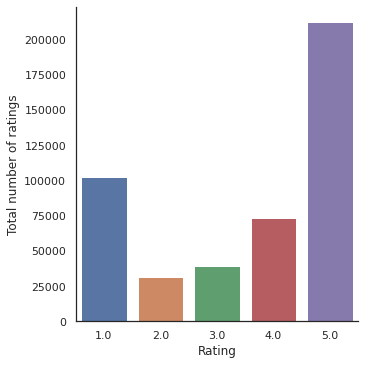

In [126]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(x="overall", data=software_data,kind='count')
    g.set_ylabels("Total number of ratings")
    g.set_xlabels("Rating")

Extracting the year information from the column 'reviewTime':

In [127]:
# CREATING A YEAR COLUMN

def year_extractor(reviewTime):
  year = reviewTime[-4:]
  return year


software_data['Year'] = software_data['reviewTime'].apply(year_extractor)

The counts of various Years in the data. The data set is from 1998 to 2018. 

In [128]:
software_data['Year'].value_counts()

2015    86324
2014    77348
2016    66786
2013    46663
2017    29350
2012    22894
2009    20000
2008    17735
2011    17061
2010    15185
2007    13962
2018    13123
2006     8486
2005     6724
2004     4685
2003     4681
2002     4144
2001     2833
2000     1326
1999      125
1998        1
Name: Year, dtype: int64

In [129]:
from collections import Counter
time_info_all = software_data['reviewTime']
month_info_all = []
month_dict_all = {"01":"January",
              "02": "February",
              "03": "March",
              "04": "April",
              "05": "May",
              "06": "June",
              "07": "July",
              "08": "August",
              "09": "September",
              "10": "October",
              "11": "November",
              "12": "December"}
for x in time_info_all:
  month_all = x[:2]
  month_word_all = month_dict_all[month_all]
  month_info_all.append(month_word_all)


year_info_all = []

for x in time_info_all:
  year_all = x[-4:]
  year_info_all.append(year_all)


frequency_month_all = Counter(month_info_all)
month_df_all = pd.DataFrame({"Jan": frequency_month_all['January'], "Feb":frequency_month_all['February'],
                         "Mar":frequency_month_all['March'],"Apr":frequency_month_all['April'],"May":frequency_month_all['May'],
                         "Jun":frequency_month_all['June'],"Jul":frequency_month_all['July'],"Aug":frequency_month_all['August'],
                         "Sep":frequency_month_all['September'],"Oct":frequency_month_all['September'],"Nov":frequency_month_all['November'],
                         "Dec":frequency_month_all['December']},index=[0])


In [130]:
frequency_year_all = Counter(year_info_all)
year_df_all = pd.DataFrame({'1998':frequency_year_all['1998'],'1999':frequency_year_all['1999'],
                        '2000':frequency_year_all['2000'], '2001':frequency_year_all['2001'], '2002':frequency_year_all['2002'],
                        '2003':frequency_year_all['2003'], '2004':frequency_year_all['2004'], '2005':frequency_year_all['2005'],
                        '2006':frequency_year_all['2006'], '2007':frequency_year_all['2007'], '2008':frequency_year_all['2008'],
                        '2009':frequency_year_all['2009'], '2010':frequency_year_all['2010'], '2011':frequency_year_all['2011'],
                        '2012':frequency_year_all['2012'], '2013':frequency_year_all['2013'], '2014':frequency_year_all['2014'],
                        '2015':frequency_year_all['2015'], '2016':frequency_year_all['2016'], '2017':frequency_year_all['2017'],
                        '2018':frequency_year_all['2018']}, index=[0])

Month-wise distribution of ratings in software_data:

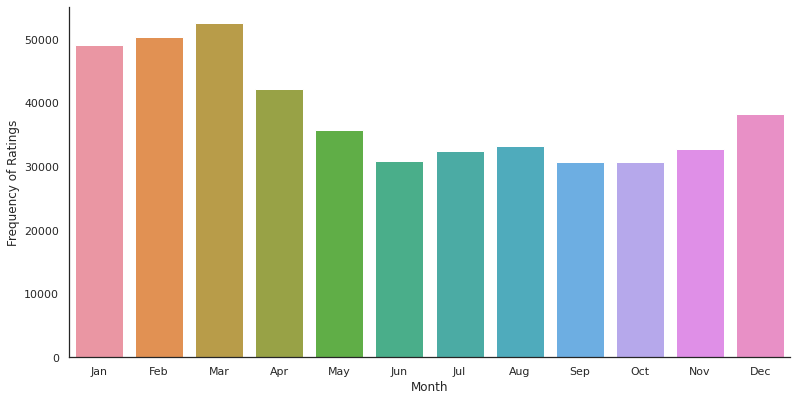

In [131]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(data=month_df_all,kind='bar',height = 5.5, aspect = 2)
    g.set_ylabels("Frequency of Ratings")
    g.set_xlabels("Month")
    

Year-wise distribution of ratings in software_data:

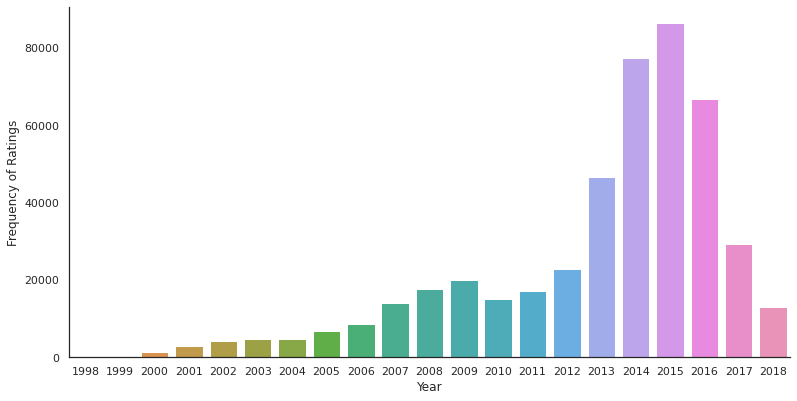

In [132]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(data=year_df_all,kind='bar',height = 5.5, aspect = 2)
    g.set_ylabels("Frequency of Ratings")
    g.set_xlabels("Year")
    

We drop the data from the years 1998 to 2012, and focus our work only on the years 2013-18.

In [133]:
# Dropping data relevant to years 1998 to 2012.

software_data.drop(software_data[software_data['Year']=='1998'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='1999'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='2000'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='2001'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='2002'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='2003'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='2004'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='2005'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='2006'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='2007'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='2008'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='2009'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='2010'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='2011'].index, inplace=True)
software_data.drop(software_data[software_data['Year']=='2012'].index, inplace=True)


The counts of the five years i.e. 2013, 2014, 2015, 2016, 2017, 2018 are shown below.

In [134]:
software_data['Year'].value_counts()

2015    86324
2014    77348
2016    66786
2013    46663
2017    29350
2018    13123
Name: Year, dtype: int64

Considering each year as a strata, a stratified sample is taken, with 20% of data points taken from each of the 5 years.

In [135]:
# TAKING STRATIFIED SAMPLE BY TREATING EACH YEAR AS A GROUP

# stratified split dataset by column
from sklearn.model_selection import train_test_split
software_data_stratified = train_test_split(software_data, train_size = 0.2, stratify=software_data['Year'], random_state = 42)

The stratified data frame is displayed below.

In [136]:
software_data_stratified = software_data_stratified[0]
software_data_stratified

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,Year
306342,5.0,True,"12 11, 2017",A157DJO32EN034,B00UB76290,{'Platform:': ' PC Download'},SAP,I don't really read on my PC. I just love Kin...,I just love Kindle.,1512950400,NaN,NaN,2017
395012,5.0,True,"04 18, 2016",A3LMFDQEKJ75SM,B000EOMY6A,NaN,Angie,Nice design... It fit my boyfriend as expected,Five Stars,1460937600,NaN,NaN,2016
195090,5.0,False,"01 14, 2014",A3LJNNGC2TRJ7E,B00E6LJ2SA,{'Format:': ' Software'},Marthasings,I have been using Quicken since the 1980's. I...,Great product,1389657600,NaN,NaN,2014
235983,1.0,True,"10 31, 2015",A1MQAXSV0157K7,B00H9A60O4,{'Format:': ' Software Download'},rodger mckinnon,"Sorry, Avast would not download.",One Star,1446249600,NaN,NaN,2015
199616,5.0,True,"10 16, 2015",A2KB1B53KKQ8OV,B00EDSI7QO,NaN,CYBERSQUARE,Making the transition from Windows 7. So far ...,So far I like what I see in 8,1444953600,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305964,2.0,True,"01 17, 2018",A26DMTVIZEFCLT,B00UB76290,{'Platform:': ' PC Download'},jpw,"Navigation is difficult, clumsy.",Two Stars,1516147200,NaN,NaN,2018
130198,5.0,True,"01 9, 2015",A1QAM39WP69A7E,B005VDPOR0,NaN,OliviaClaire,The bundle included all the programs I desired...,... all the programs I desired and I am having...,1420761600,NaN,NaN,2015
303862,1.0,True,"03 25, 2015",A2E31NXG9LHSBY,B00U7SN7SW,NaN,Stephanie,"This thing froze my computer, so I restarted i...",HORRIBLE,1427241600,3,NaN,2015
155829,5.0,False,"01 6, 2013",A1FI11RM530AV5,B0095C08YM,NaN,Conan the Barbarian,After many years of being away from Trend Micr...,EXCELLENT INTERNET SECURITY 2013,1357430400,3,NaN,2013


The counts of the years in the stratified data set is displayed below.

In [137]:
software_data_stratified['Year'].value_counts()

2015    17265
2014    15469
2016    13357
2013     9332
2017     5870
2018     2625
Name: Year, dtype: int64

In [138]:
from collections import Counter
time_info = software_data_stratified['reviewTime']
month_info = []
month_dict = {"01":"January",
              "02": "February",
              "03": "March",
              "04": "April",
              "05": "May",
              "06": "June",
              "07": "July",
              "08": "August",
              "09": "September",
              "10": "October",
              "11": "November",
              "12": "December"}
for x in time_info:
  month = x[:2]
  month_word = month_dict[month]
  month_info.append(month_word)


year_info = []

for x in time_info:
  year = x[-4:]
  year_info.append(year)


frequency_month = Counter(month_info)
month_df = pd.DataFrame({"Jan": frequency_month['January'], "Feb":frequency_month['February'],
                         "Mar":frequency_month['March'],"Apr":frequency_month['April'],"May":frequency_month['May'],
                         "Jun":frequency_month['June'],"Jul":frequency_month['July'],"Aug":frequency_month['August'],
                         "Sep":frequency_month['September'],"Oct":frequency_month['September'],"Nov":frequency_month['November'],
                         "Dec":frequency_month['December']},index=[0])




In [139]:
frequency_year = Counter(year_info)
year_df = pd.DataFrame({ '2013':frequency_year['2013'], '2014':frequency_year['2014'],
                        '2015':frequency_year['2015'], '2016':frequency_year['2016'], '2017':frequency_year['2017'],
                        '2018':frequency_year['2018']}, index=[0])

Month-wise distribution of reviews in the entire stratified data set.

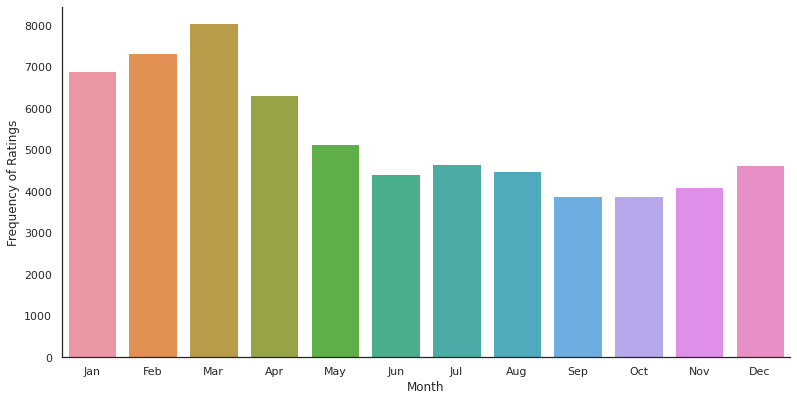

In [140]:

sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(data=month_df,kind='bar',height = 5.5, aspect = 2)
    g.set_ylabels("Frequency of Ratings")
    g.set_xlabels("Month")
    

Year-wise distribution of reviews in the entire stratified data set.

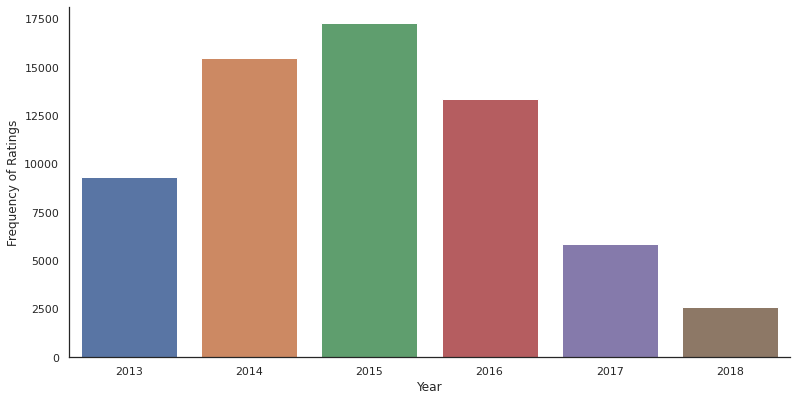

In [141]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(data=year_df,kind='bar',height = 5.5, aspect = 2)
    g.set_ylabels("Frequency of Ratings")
    g.set_xlabels("Year")
    


Checking number of missing values across various columns.

In [142]:
print('Number of missing values across columns: \n',software_data_stratified.isnull().sum())

Number of missing values across columns: 
 overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
style             24963
reviewerName          4
reviewText           14
summary              12
unixReviewTime        0
vote              53694
image             63665
Year                  0
dtype: int64


In [143]:
print('Number of missing values across columns: \n',software_metadata.isnull().sum())

Number of missing values across columns: 
 category             0
tech1                0
description          0
fit                  0
title                0
also_buy             0
tech2                0
brand                0
feature              0
rank                 0
also_view            0
main_cat             0
similar_item         0
date                 0
price                0
asin                 0
imageURL             0
imageURLHighRes      0
details            852
dtype: int64


Distribution of ratings in the stratified sample data set.

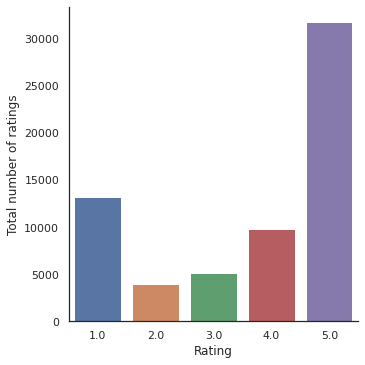

In [144]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(x="overall", data=software_data_stratified,kind='count')
    g.set_ylabels("Total number of ratings")
    g.set_xlabels("Rating")

In [145]:
#Replacing empty lists / blanks with NaN
software_metadata['title'] = software_metadata['title'].apply(lambda y: np.nan if len(y)==0 else y)
software_metadata['brand'] = software_metadata['brand'].apply(lambda y: np.nan if len(y)==0 else y)
software_metadata['category'] = software_metadata['category'].apply(lambda y: np.nan if len(y)==0 else y)
# cleaned_software_metadata['rank'] = cleaned_software_metadata['rank'].apply(lambda y: np.nan if len(y)==0 else y)
# cleaned_software_metadata['also_view'] = cleaned_software_metadata['also_view'].apply(lambda y: np.nan if len(y)==0 else y)
# cleaned_software_metadata['also_buy'] = cleaned_software_metadata['also_buy'].apply(lambda y: np.nan if len(y)==0 else y)
#cleaned_software_metadata['main_cat'] = cleaned_software_metadata['main_cat'].apply(lambda y: np.nan if len(y)==0 else y)
#cleaned_software_metadata['similar_item'] = cleaned_software_metadata['similar_item'].apply(lambda y: np.nan if len(y)==0 else y)
software_metadata['asin'] = software_metadata['asin'].apply(lambda y: np.nan if len(y)==0 else y)





In [146]:
print('Number of missing values across columns: \n',software_metadata.isnull().sum())

Number of missing values across columns: 
 category           2063
tech1                 0
description           0
fit                   0
title                 6
also_buy              0
tech2                 0
brand               652
feature               0
rank                  0
also_view             0
main_cat              0
similar_item          0
date                  0
price                 0
asin                  0
imageURL              0
imageURLHighRes       0
details             852
dtype: int64


In [147]:
software_metadata = software_metadata.rename(columns={"asin":"Item ID"})
software_data_stratified = software_data_stratified.rename(columns={"asin":"Item ID"})

In [148]:
len(software_data_stratified), len(software_metadata)

(63918, 26790)

Creating a combined data frame out of the metadata and the review data:

In [149]:
merged_data = pd.merge(software_data_stratified,software_metadata,on='Item ID')
# merged_data = merged_data.dropna()


In [150]:
# retaining the rows where category and brand is not missing

merged_data = merged_data[merged_data['category'].notna()]
merged_data = merged_data[merged_data['brand'].notna()]


In [151]:
print('Number of missing values across columns: \n',merged_data.isnull().sum())

Number of missing values across columns: 
 overall                0
verified               0
reviewTime             0
reviewerID             0
Item ID                0
style              24293
reviewerName           4
reviewText            13
summary               10
unixReviewTime         0
vote               50361
image              59340
Year                   0
category               0
tech1                  0
description            0
fit                    0
title                  0
also_buy               0
tech2                  0
brand                  0
feature                0
rank                   0
also_view              0
main_cat               0
similar_item           0
date                   0
price                  0
imageURL               0
imageURLHighRes        0
details              623
dtype: int64


In [152]:
merged_data

,overall,verified,reviewTime,reviewerID,Item ID,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,Year,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,5.0,True,"12 11, 2017",A157DJO32EN034,B00UB76290,{'Platform:': ' PC Download'},SAP,I don't really read on my PC. I just love Kin...,I just love Kindle.,1512950400,NaN,NaN,2017,"[Software, Lifestyle & Hobbies, Home Publishing]",,[<div>Kindle for PC reading app gives users th...,,Kindle for PC [Download],"[B01B28HHQ8, B07M6LJ8JL, B01ETYTGIE, B06XX3195...",,Amazon Digital Services LLC,"[Buy once, read everywhere. Sign in with an Am...",[],"[B004DLPXAO, B00KT54X3G, B00GMTC6HI, B00AVPYT8...",Software,,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai..."
1,5.0,True,"01 25, 2017",AW3UB7J1QBHWD,B00UB76290,{'Platform:': ' PC Download'},Eileen,I do miss my real books but this is a wonderfu...,... do miss my real books but this is a wonder...,1485302400,NaN,NaN,2017,"[Software, Lifestyle & Hobbies, Home Publishing]",,[<div>Kindle for PC reading app gives users th...,,Kindle for PC [Download],"[B01B28HHQ8, B07M6LJ8JL, B01ETYTGIE, B06XX3195...",,Amazon Digital Services LLC,"[Buy once, read everywhere. Sign in with an Am...",[],"[B004DLPXAO, B00KT54X3G, B00GMTC6HI, B00AVPYT8...",Software,,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai..."
2,1.0,True,"09 25, 2015",A345D38YIHMUEH,B00UB76290,{'Platform:': ' PC Download'},Charlotte Wooden-Hillis,Will not work on my laptop.,Will not work on my laptop.,1443139200,NaN,NaN,2015,"[Software, Lifestyle & Hobbies, Home Publishing]",,[<div>Kindle for PC reading app gives users th...,,Kindle for PC [Download],"[B01B28HHQ8, B07M6LJ8JL, B01ETYTGIE, B06XX3195...",,Amazon Digital Services LLC,"[Buy once, read everywhere. Sign in with an Am...",[],"[B004DLPXAO, B00KT54X3G, B00GMTC6HI, B00AVPYT8...",Software,,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai..."
3,4.0,True,"03 7, 2016",APWINJ9HAONIP,B00UB76290,{'Platform:': ' PC Download'},J. Rhyner,Works well when I don't have my Kindle White P...,Convient when on computer.,1457308800,NaN,NaN,2016,"[Software, Lifestyle & Hobbies, Home Publishing]",,[<div>Kindle for PC reading app gives users th...,,Kindle for PC [Download],"[B01B28HHQ8, B07M6LJ8JL, B01ETYTGIE, B06XX3195...",,Amazon Digital Services LLC,"[Buy once, read everywhere. Sign in with an Am...",[],"[B004DLPXAO, B00KT54X3G, B00GMTC6HI, B00AVPYT8...",Software,,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai..."
4,5.0,True,"01 2, 2017",AEI7AM3M3G4A8,B00UB76290,{'Platform:': ' PC Download'},Rev Dave,I use it on my laptop and on a semi-regular basis,My PC Kindle app,1483315200,NaN,NaN,2017,"[Software, Lifestyle & Hobbies, Home Publishing]",,[<div>Kindle for PC reading app gives users th...,,Kindle for PC [Download],"[B01B28HHQ8, B07M6LJ8JL, B01ETYTGIE, B06XX3195...",,Amazon Digital Services LLC,"[Buy once, read everywhere. Sign in with an Am...",[],"[B004DLPXAO, B00KT54X3G, B00GMTC6HI, B00AVPYT8...",Software,,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65616,5.0,True,"03 4, 2015",A2LY4H9K5DLFJ8,B0040GACGM,NaN,RM,Great value!,Five Stars,1425427200,NaN,NaN,2015,"[Software, Antivirus & Security, Internet Secu...",,[Norton Internet Security protects your busine...,,Norton Internet Security 2011 - 10 User [Old V...,[],,Symantec,[Stay protected without sacrificing performanc...,"15,721 in Software (",[],Software,,</div>,,[],[],"{'Shipping Weight:': '2.1 ounces', 'ASIN:': 'B..."
65618,1.0,False,"09 15, 2014",A1UF4W3SUQ8SM2,B000FPJY66,NaN,Lala,This game does not work for windows 7. I don't...,Wouldn't work.,1410739200,NaN,NaN,2014,"[Software, Children's, Early Learning]",,"[Learn to Read: Phonics, Word Building & Writi...",,Jum

In [153]:
counts_of_users = merged_data['reviewerID'].value_counts()
counts_of_users

A3W4D8XOGLWUN5    15
A31N0XY2UTB25C    14
AKHPBCJ0PKGUH     13
A125ZNOVIZTWNN     8
A14V7Y1TE21VT3     8
                  ..
AUA2LHWY06PP1      1
ATR4ADTTTPIKR      1
A249P7H44YTV8J     1
A3EQ7UKTVHBZBJ     1
AULSRRGHDJJTA      1
Name: reviewerID, Length: 55576, dtype: int64

In [154]:
counts_of_users = dict(filter(lambda x: x[1] >= 5,counts_of_users.items()))

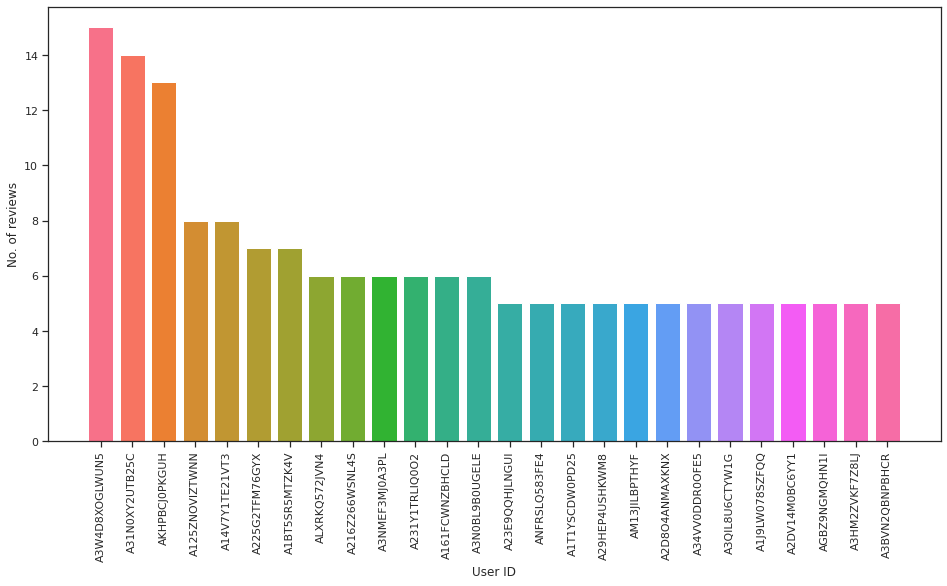

In [155]:
import matplotlib.pyplot as plt

ind = np.arange(len(counts_of_users))
palette = sns.color_palette("husl", len(counts_of_users))
plot = plt.figure(figsize=(16, 8))
plot = plt.bar(ind, list(counts_of_users.values()), color=palette)


plot = plt.xticks(ind, list(counts_of_users.keys()))
plot = plt.ylabel("No. of reviews")
plot = plt.xlabel("User ID")
plot = plt.xticks(rotation = 90)
plot = plt.show()



Trying to extract a list of all unique categories in the data set

In [156]:
cat_list = np.unique(merged_data['category'])
cat_list

array([list(['Software', 'Accounting & Finance']),
       list(['Software', 'Accounting & Finance', 'Business Accounting']),
       list(['Software', 'Accounting & Finance', 'Check Printing']), ...,
       list(['Software', 'Video', 'Video Editing', '</span></span></span>', 'New 64-bit performance', 'Easily create movies and multimedia', 'Enhance with 1,500 effects', 'Try multi-track editing', 'Free tracks from Triple Scoop Music', '64-bit performance', '17 royalty-free tracks from Triple Scoop Music', 'Drag-and-drop video HD editing', 'Includes 1500+ effects, titles and templates', '6-track frame-accurate editing', 'Simple sharing to YouTube, Facebook and Vimeo']),
       list(['Software', 'Video', 'Video Editing', '</span></span></span>', 'New 64-bit performance', 'NewBlue Bonus Effects', 'Enhanced Live Screen Capture', 'Free tracks from Triple Scoop Music', 'Blu-ray Disc authoring', '64-bit performance', 'Enhanced Live Screen Capture', 'NewBlue effects pack', '17 royalty-free tracks

In [157]:
mass_category_list = []
for c in cat_list:
  # each 'c' is a list of categories
  for i in c[1:2]: # since otherwise weird "categories" come in
    mass_category_list.append(i)

list_of_all_categories = np.unique(mass_category_list)

In [158]:
list_of_all_categories

array(['Accounting & Finance', 'Accounting &amp; Finance',
       'Antivirus & Security', 'Antivirus &amp; Security',
       'Business & Office', 'Business &amp; Office', "Children's",
       'Design & Illustration', 'Design &amp; Illustration',
       'Digital Software', 'Education & Reference',
       'Education &amp; Reference', 'Games', 'Lifestyle & Hobbies',
       'Lifestyle &amp; Hobbies', 'Music', 'Networking & Servers',
       'Networking &amp; Servers', 'Operating Systems', 'Photography',
       'Programming & Web Development',
       'Programming &amp; Web Development', 'Tax Preparation',
       'Utilities', 'Video'], dtype='<U33')

In [159]:
# replacing '&amp' and '&amp;' with '&'
proper_syntaxed_category_list = []
for cat in list_of_all_categories:
  if '&amp;' in cat.split():
    x = cat.replace('&amp;','&')
  elif '&amp' in cat.split():
    x = cat.replace('&amp','&')
  else:
    x = cat

  proper_syntaxed_category_list.append(x)

In [160]:
list_of_all_categories = np.unique(proper_syntaxed_category_list)

LIST OF ALL CATEGORIES:

In [161]:
list_of_all_categories

array(['Accounting & Finance', 'Antivirus & Security',
       'Business & Office', "Children's", 'Design & Illustration',
       'Digital Software', 'Education & Reference', 'Games',
       'Lifestyle & Hobbies', 'Music', 'Networking & Servers',
       'Operating Systems', 'Photography',
       'Programming & Web Development', 'Tax Preparation', 'Utilities',
       'Video'], dtype='<U29')

In [162]:
category_column = []

for index, row in merged_data.iterrows():
  cats = row['category']
  category_of_current_row = cats[1:2]
  if category_of_current_row in list_of_all_categories:
    category_column.append(category_of_current_row[0]) #appending the value instead of [value]
  else:
    category_column.append(np.nan)

We add a column 'Category of Software' in both the merged_data and software_data_stratified data frames.

In [163]:
category_column_for_metadata = []
# retaining the rows where category and brand is not missing

software_metadata = software_metadata[software_metadata['category'].notna()]
software_metadata = software_metadata[software_metadata['brand'].notna()]

for index, row in software_metadata.iterrows():
  temp = row['category']
  category_of_current_row = temp[1:2]
  if category_of_current_row in list_of_all_categories:
    category_column_for_metadata.append(category_of_current_row[0]) #appending the value instead of [value]
  else:
    category_column_for_metadata.append(np.nan)


software_metadata['Category of Software'] = category_column_for_metadata

# retaining rows where category of software is not missing
software_metadata = software_metadata[software_metadata['Category of Software'].notna()]


In [164]:
merged_data['Category of Software'] = category_column

Counts of various categories in our data set is shown below. Note that 'Games' has only two data points.

In [165]:
merged_data['Category of Software'].value_counts()

Digital Software                 19236
Antivirus & Security              7203
Business & Office                 6061
Lifestyle & Hobbies               4491
Accounting & Finance              3800
Operating Systems                 3532
Utilities                         3058
Education & Reference             2397
Children's                        2309
Photography                       1924
Video                             1608
Design & Illustration             1136
Music                              512
Networking & Servers               471
Programming & Web Development      308
Tax Preparation                    145
Games                                2
Name: Category of Software, dtype: int64

Plot of distribution of categories in stratified_data set:

<Figure size 720x360 with 0 Axes>

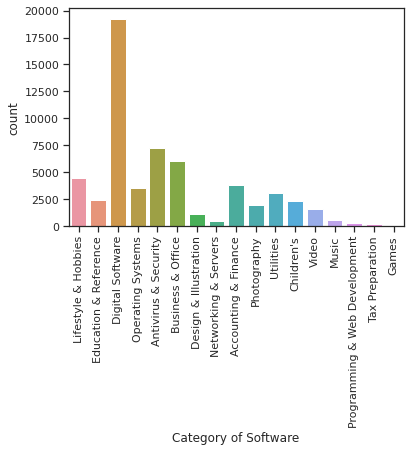

<Figure size 720x360 with 0 Axes>

In [166]:


from matplotlib import pyplot as plt


plot = sns.countplot(x='Category of Software', data=merged_data)

plt.setp(plot.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))


Hence, we remove 'Games' from our 'final_list_of_categories':

In [167]:
final_list_of_categories = list(list_of_all_categories)
final_list_of_categories.remove('Games')

In [168]:
final_list_of_categories

['Accounting & Finance',
 'Antivirus & Security',
 'Business & Office',
 "Children's",
 'Design & Illustration',
 'Digital Software',
 'Education & Reference',
 'Lifestyle & Hobbies',
 'Music',
 'Networking & Servers',
 'Operating Systems',
 'Photography',
 'Programming & Web Development',
 'Tax Preparation',
 'Utilities',
 'Video']

In [169]:
# retaining rows where 'Category of Software' is not 'NaN'
merged_data = merged_data[merged_data['Category of Software'].notna()]

In [170]:
# software_metadata = software_metadata[software_metadata['Category of Software']!='Games']
software_metadata.reset_index(drop=True, inplace=True)
software_metadata

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,Item ID,imageURL,imageURLHighRes,details,Category of Software
0,"[Software, Education & Reference, Test Prepara...",,[],,Prentice Hall Test Manager a Comprehensive Sui...,[],,prentice hall,[],"54,036 in Software (",[],Software,,</div>,,0130852414,[],[],NaN,Education & Reference
1,"[Software, Programming & Web Development, Web ...",,[System Requirements:\n\n Microsoft Windows...,,Microsoft FrontPage 2003 (120 Day Learning Tri...,[],,Microsoft,"[SAME FUNCTIONALITY AS FULL VERSION, PERFECT F...","32,755 in Software (",[],Software,,</div>,,0205064833,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,Programming & Web Development
2,"[Software, Education & Reference]",,[PACKED WITH RESOURCES YOULL FIND NOWHERE ELSE...,,Zondervan Bible Study Library: Leader's Editio...,[],,Zondervan,[],"46,133 in Software (",[],Software,,</div>,,0310230691,[],[],NaN,Education & Reference
3,"[Software, Education & Reference]",,"[Powered by Pradis, a CD-ROM featuring study n...",,The Zondervan NIV Study Bible 5.1 for Windows,[],,Zondervan,"[Unlimited space for note taking, Provides sch...","22,024 in Software (","[B0009G2K12, 0310937221, 0966090918, B000021Y3I]",Software,,</div>,,0310258928,[],[],NaN,Education & Reference
4,"[Software, Photography]",,[],,Adobe Photoshop CS3 Layer Essentials,[],,Nationas Association of Photoshipo Professionals,[],"25,992 in Software (",[],Software,,</div>,$9.00,0321515129,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,Photography
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,"[Software, Photography, Waistline:Natural , Ne...",,[NOTE: Please compare the detail sizes with yo...,,Women Bohemian Neck Tie Vintage Printed Ethnic...,[],,FEITONG,"[Waistline:Natural , Neckline:V-Neck, Sleeve L...","21,438,688 in Clothing, Shoes & Jewelry (",[],"<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",,B01HD1CQPK,[],[],{},Photography
21467,"[Software, Children's]",,[<b>Features: </b><br>1. Beautiful and fabulou...,,925 Sterling Silver Angel Wings Heart Pendant ...,"[B07B4B12JX, B008UX1WJ2]",,17maimeng,[Material: Guaranteed 100% Real Silver+Platinu...,"1,389,844 in Clothing, Shoes & Jewelry (","[B008UX1WJ2, B0094JVCKU, B077J3DR69, B07J4Z659...","<img src=""https://images-na.ssl-images-amazon....",,17maimeng,$24.00,B01HEFZJC2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},Children's
21468,"[Software, Children's, Material: Guaranteed 10...",,[<b>Features: </b><br>1. Beautiful and fabulou...,,925 Sterling Silver Love Heart Opal Pendant Ne...,[],,17maimeng,[Material: Guaranteed 100% Real Silver+Platinu...,"1,469,307 in Clothing, Shoes & Jewelry (","[B074M486S8, B01D4H965K, B077L7GGF4, B019D8X0W...","<img src=""https://images-na.ssl-images-amazon....",,17maimeng,$23.20,B01HEFZKEE,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},Children's
21469,"[Software, Digital Software, Antivirus & Secur...",,[<div>Mac Internet Security X9 contains two of...,,Intego Mac Internet Security X9 - 1 Mac - 1 ye...,[],,Intego,[Award-winning antivirus software to protect a...,"2,733 in Software (","[B01MF5MTWP, B015724B8M, B07CYFFH4H, B07CY54KL...",Software,,</div>,$39.99,B01HF3G4BS,[],[],"{'Downloading:': 'Currently, this item is avai...",Digital Software


In [171]:
merged_data.reset_index(drop = True, inplace = True)
merged_data

,overall,verified,reviewTime,reviewerID,Item ID,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,Year,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,Category of Software
0,5.0,True,"12 11, 2017",A157DJO32EN034,B00UB76290,{'Platform:': ' PC Download'},SAP,I don't really read on my PC. I just love Kin...,I just love Kindle.,1512950400,NaN,NaN,2017,"[Software, Lifestyle & Hobbies, Home Publishing]",,[<div>Kindle for PC reading app gives users th...,,Kindle for PC [Download],"[B01B28HHQ8, B07M6LJ8JL, B01ETYTGIE, B06XX3195...",,Amazon Digital Services LLC,"[Buy once, read everywhere. Sign in with an Am...",[],"[B004DLPXAO, B00KT54X3G, B00GMTC6HI, B00AVPYT8...",Software,,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai...",Lifestyle & Hobbies
1,5.0,True,"01 25, 2017",AW3UB7J1QBHWD,B00UB76290,{'Platform:': ' PC Download'},Eileen,I do miss my real books but this is a wonderfu...,... do miss my real books but this is a wonder...,1485302400,NaN,NaN,2017,"[Software, Lifestyle & Hobbies, Home Publishing]",,[<div>Kindle for PC reading app gives users th...,,Kindle for PC [Download],"[B01B28HHQ8, B07M6LJ8JL, B01ETYTGIE, B06XX3195...",,Amazon Digital Services LLC,"[Buy once, read everywhere. Sign in with an Am...",[],"[B004DLPXAO, B00KT54X3G, B00GMTC6HI, B00AVPYT8...",Software,,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai...",Lifestyle & Hobbies
2,1.0,True,"09 25, 2015",A345D38YIHMUEH,B00UB76290,{'Platform:': ' PC Download'},Charlotte Wooden-Hillis,Will not work on my laptop.,Will not work on my laptop.,1443139200,NaN,NaN,2015,"[Software, Lifestyle & Hobbies, Home Publishing]",,[<div>Kindle for PC reading app gives users th...,,Kindle for PC [Download],"[B01B28HHQ8, B07M6LJ8JL, B01ETYTGIE, B06XX3195...",,Amazon Digital Services LLC,"[Buy once, read everywhere. Sign in with an Am...",[],"[B004DLPXAO, B00KT54X3G, B00GMTC6HI, B00AVPYT8...",Software,,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai...",Lifestyle & Hobbies
3,4.0,True,"03 7, 2016",APWINJ9HAONIP,B00UB76290,{'Platform:': ' PC Download'},J. Rhyner,Works well when I don't have my Kindle White P...,Convient when on computer.,1457308800,NaN,NaN,2016,"[Software, Lifestyle & Hobbies, Home Publishing]",,[<div>Kindle for PC reading app gives users th...,,Kindle for PC [Download],"[B01B28HHQ8, B07M6LJ8JL, B01ETYTGIE, B06XX3195...",,Amazon Digital Services LLC,"[Buy once, read everywhere. Sign in with an Am...",[],"[B004DLPXAO, B00KT54X3G, B00GMTC6HI, B00AVPYT8...",Software,,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai...",Lifestyle & Hobbies
4,5.0,True,"01 2, 2017",AEI7AM3M3G4A8,B00UB76290,{'Platform:': ' PC Download'},Rev Dave,I use it on my laptop and on a semi-regular basis,My PC Kindle app,1483315200,NaN,NaN,2017,"[Software, Lifestyle & Hobbies, Home Publishing]",,[<div>Kindle for PC reading app gives users th...,,Kindle for PC [Download],"[B01B28HHQ8, B07M6LJ8JL, B01ETYTGIE, B06XX3195...",,Amazon Digital Services LLC,"[Buy once, read everywhere. Sign in with an Am...",[],"[B004DLPXAO, B00KT54X3G, B00GMTC6HI, B00AVPYT8...",Software,,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai...",Lifestyle & Hobbies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58188,5.0,True,"03 4, 2015",A2LY4H9K5DLFJ8,B0040GACGM,NaN,RM,Great value!,Five Stars,1425427200,NaN,NaN,2015,"[Software, Antivirus & Security, Internet Secu...",,[Norton Internet Security protects your busine...,,Norton Internet Security 2011 - 10 User [Old V...,[],,Symantec,[Stay protected without sacrificing performanc...,"15,721 in Software (",[],Software,,</div>,,[],[],"{'Shipping Weight:': '2.1 ounces', 'ASIN:': 'B...",Antivirus & Security
58189,1.0,False,"09 15, 2014",A1UF4W3SUQ8SM2,B000FPJY66,NaN,Lala,This game does not work for windows 7. I 

In [172]:
# merged_data.to_csv('/content/drive/MyDrive/Amazon Software/Amazon Software All Data.csv')

In [173]:
# software_metadata.to_csv('/content/drive/MyDrive/Amazon Software/Amazon Software Product Meta Data.csv')

# **Recommendations based on popularity of products:**

Getting counts of every item, i.e. the number of times an item was reviewed:

In [174]:
merged_data['Item ID'].value_counts()

B00UB76290    1826
B00CTTEKJW    1579
B00NG7JVSQ    1268
B00H9A60O4     928
B00EZPXYP4     649
              ... 
B005S0Z4GW       1
B000OC7PAW       1
B014HXFFIM       1
B004FGLHQG       1
B015PMG72W       1
Name: Item ID, Length: 6185, dtype: int64

Saving the above in a dictionary:

In [175]:
# items_dict is already sorted
items_dict = merged_data['Item ID'].value_counts()

## **Most Popular 'n' products recommender:**

The function most_popular_n_recommender(n) returns the most popular 'n' products, popularity being measured by the no. of times a product was bought / reviewed.

In [176]:
def most_popular_n_recommender(n):
  top_n_items_dict = items_dict[:n]
  top_n_items = list(top_n_items_dict.keys())
  relevant_counts_from_input_category = list(dict(items_dict).values())
  relevant_counts_from_input_category_n = relevant_counts_from_input_category[:n]
  # making a data frame format of the top_n_items

  top_n_items_df = pd.DataFrame({"Item ID":top_n_items,
                                 "No. of times bought": relevant_counts_from_input_category_n})
  
  output_df = pd.merge(software_metadata,top_n_items_df, on = 'Item ID')

  # retaining only the relevant columns for displaying

  output_df = pd.DataFrame({"Item ID":output_df['Item ID'], 
                            "Title": output_df['title'],
                            "Brand": output_df['brand'],
                            "Category": output_df['Category of Software'],
                            "No. of times bought": output_df['No. of times bought']})
  

  output_df = output_df.sort_values(by='No. of times bought',ascending=False)
  output_df.reset_index(drop = True, inplace = True)
  return output_df

In [177]:
most_popular_n_recommender(10)

,Item ID,Title,Brand,Category,No. of times bought
0,B00UB76290,Kindle for PC [Download],Amazon Digital Services LLC,Lifestyle & Hobbies,1826
1,B00CTTEKJW,Amazon Music [PC] [Download],Amazon Digital Services LLC,Digital Software,1579
2,B00NG7JVSQ,TurboTax Deluxe 2014 Fed + State + Fed Efile T...,by\n \n Intuit,Digital Software,1268
3,B00H9A60O4,Avast Free Antivirus 2015 [Download],AVAST Software s.r.o.,Digital Software,928
4,B00EZPXYP4,NORTON 360 21.0 EN 1U 3LIC MM,Symantec,Antivirus & Security,649
5,B015724OVG,Norton Security Deluxe &ndash; 5 Devices &ndas...,Symantec,Digital Software,535
6,B00M76N6MO,Quicken For Mac Personal Finance &amp; Budgeti...,Intuit,Accounting & Finance,441
7,B01637RFR4,TurboTax Deluxe 2015 Federal + State Taxes - T...,Intuit,Digital Software,419
8,B01617VPUY,TurboTax Deluxe 2015 Federal + State Taxes + F...,Intuit,Business & Office,414
9,B00PG8FOSY,H&amp;R Block Tax Software Deluxe + State 2014...,H&R Block,Digital Software,400


## **Most popular 'n' products recommender, based on an input 'category':**

Given a category, 'n' most popular products from the given category is displayed.

In [178]:
def most_popular_n_recommender_category_wise(n, input_category):
  # group software review data by all categories
  grouped_software_data = merged_data.groupby(by = 'Category of Software')

  # get the data relevant to the input_category
  input_category_df = grouped_software_data.get_group(input_category)

  # getting counts of how many times each item was bought

  items_dict_category_wise = input_category_df['Item ID'].value_counts()

  # storing only the item IDs
  # this is sorted already in descending order of 'no. of times bought'
  relevant_items_from_input_category = list(items_dict_category_wise.keys())
  relevant_counts_from_input_category = list(dict(items_dict_category_wise).values()) 
  
  # taking only the first n item IDs

  relevant_items_from_input_category_n = relevant_items_from_input_category[:n]
  relevant_counts_from_input_category_n = relevant_counts_from_input_category[:n]
  # getting the corresponding product metadata

  top_n_items_category_wise_df = pd.DataFrame({"Item ID":relevant_items_from_input_category_n, 
                                               "No. of times bought":relevant_counts_from_input_category_n })
  
  output_df = pd.merge(software_metadata,top_n_items_category_wise_df, on = 'Item ID')

  # retaining only the relevant columns for displaying

  output_df = pd.DataFrame({"Item ID":output_df['Item ID'], 
                            "Title": output_df['title'],
                            "Brand": output_df['brand'],
                            "Category": output_df['Category of Software'],
                            "No. of times bought":output_df['No. of times bought']})
  
  output_df = output_df.drop_duplicates()
  output_df = output_df.sort_values(by = 'No. of times bought', ascending = False)
  output_df.reset_index(drop = True, inplace = True)
  return output_df



In [179]:
most_popular_n_recommender_category_wise(5, 'Lifestyle & Hobbies')

,Item ID,Title,Brand,Category,No. of times bought
0,B00UB76290,Kindle for PC [Download],Amazon Digital Services LLC,Lifestyle & Hobbies,1826
1,B00UB769KC,Kindle for Mac [Download],Amazon Digital Services LLC,Lifestyle & Hobbies,251
2,B005IIUFYU,Broderbund PrintMaster 18.1,Broderbund,Lifestyle & Hobbies,178
3,B00EXPSW2Q,The Print Shop Deluxe 3.5,Encore,Lifestyle & Hobbies,79
4,B00NA6LO8I,Hallmark Card Studio 2015 Deluxe,Nova Development US,Lifestyle & Hobbies,48


## **Most popular 'n' products, from all of the 16 categories:**

Most popular 'n' products from each of the 16 categories is displayed.

In [180]:
def most_popular_n_products_all_categories(n):

  # empty list for storing data frames relevant to each category
  df_list = []
  for cat in final_list_of_categories:
    temp = most_popular_n_recommender_category_wise(n, cat)

    # temp stores the most popular 'n' products from the category 'cat'

    # storing temp in the df_list for later

    df_list.append(temp)

  # creating a data frame out of all the individual category-wise data frames
  output_df = pd.concat(df_list)
  output_df.reset_index(drop = True, inplace = True)
  return output_df


In [181]:
most_popular_n_products_all_categories(2)

,Item ID,Title,Brand,Category,No. of times bought
0,B00M76N6MO,Quicken For Mac Personal Finance &amp; Budgeti...,Intuit,Accounting & Finance,441
1,B00E6LJBUO,Quicken Premier 2014 [Old Version],Intuit,Accounting & Finance,316
2,B00EZPXYP4,NORTON 360 21.0 EN 1U 3LIC MM,Symantec,Antivirus & Security,649
3,B00EZQYC8G,Norton Internet Security 2014 - 1 Year / 3 Lic...,Symantec,Antivirus & Security,398
4,B01617VPUY,TurboTax Deluxe 2015 Federal + State Taxes + F...,Intuit,Business & Office,414
5,B01617VQJ4,Intuit TurboTax Premier 2015 Federal + State T...,Intuit,Business & Office,258
6,B00005LBVS,The Learning Company - Oregon Trail 5th Edition,The Learning Company,Children's,68
7,B00D9ILK7W,Office Suite,Encore,Children's,37
8,B00ANH074Y,Manga Studio 5,Smith Micro Software Inc.,Design & Illustration,128
9,B01F70HGA4,CLIP STUDIO PAINT PRO,Smith Micro Software Inc.,Design & Illustration,43


# **Preparing data-frame 'surprise_data', for implementing algorithms from surpriseLib.**

Oversampling is done from the groups of rating 4.0, 3.0, 2.0 and 1.0 - since they have very low frequency compared to ratings of 5.0.
A balanced data set is constructed to train the algorithm.

The idea here behind the manual oversampling, was to replicate each group of ratings (1.0, 2.0, 3.0, 4.0) an appropriate number of times, so as to have fairly the same number of data points as the group 5.0

In [182]:
surprise_data = pd.DataFrame ({"User ID":merged_data.reviewerID,"Item ID":merged_data['Item ID'],"Ratings":merged_data.overall})

In [183]:
#surprise_data = surprise_data.dropna()

In [184]:
grouped_sd = surprise_data.groupby('Ratings')
group_five = grouped_sd.get_group(5.0)
# group_five = group_five.sample(frac=1, replace=False, random_state=1)
group_5 = group_five

In [185]:
group_four = grouped_sd.get_group(4.0)
group_three = grouped_sd.get_group(3.0)
group_two = grouped_sd.get_group(2.0)
group_one = grouped_sd.get_group(1.0)

In [186]:
#group_five

In [187]:

count_five = len(group_5)
def get_replicator_value(group_x):
  count_x = len(group_x)
  k=1
  sum = 0
  while sum < count_five:
    sum = sum + count_x
    k=k+1

  return k-2


In [188]:
group_4 = pd.concat([group_four]*get_replicator_value(group_four),ignore_index=True)

In [189]:
group_3 = pd.concat([group_three]*get_replicator_value(group_three),ignore_index=True)


In [190]:
group_2 = pd.concat([group_two]*get_replicator_value(group_two),ignore_index=True)


In [191]:
group_1 = pd.concat([group_one]*get_replicator_value(group_one),ignore_index=True)


In [192]:
surprise_data_balanced = pd.concat([group_5,group_4,group_3,group_2,group_1])
surprise_data_balanced = surprise_data_balanced.sample(frac=1,random_state=42)
surprise_data_balanced

,User ID,Item ID,Ratings
20851,A2DWA90IFXAYFU,B00MCLG14O,2.0
23027,A2JVIA9P648H6Y,B006T4SQG6,2.0
8583,A1DGVP1E66GMPJ,B00CTTEKJW,5.0
31196,ANWG4TWZMVTKV,B001GL6QHS,5.0
52032,AVKHD33ROHV6G,B00NKY4ZCC,5.0
...,...,...,...
26840,A1RKC8MIOS183Z,B00BZY0QYA,2.0
8627,A1APDO51GMW3O5,B00005LJEN,1.0
20266,A26A1UNLCLX3WD,B00005IB4S,2.0
20680,AJRFDI7L8F10,B0002DOECA,1.0


### **Data set is now balanced with respect to the five classes of ratings:**

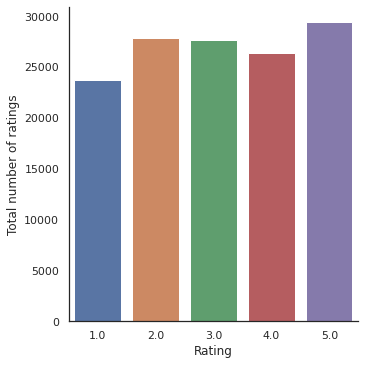

In [193]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(x="Ratings", data=surprise_data_balanced,kind='count')
    g.set_ylabels("Total number of ratings")
    g.set_xlabels("Rating")

The data is split into train and test sets, with 25% being kept aside for testing.

In [194]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(surprise_data_balanced,test_size=0.25, random_state = 42)

# doing the split with sklearn and not surpriseLib so that we can drop duplicates from the test_df to avoid inflating accuracy metrics, etc.

In [195]:
test_df = test_df.drop_duplicates()
test_df

,User ID,Item ID,Ratings
21631,A7WSR9DA9MTPS,B00002S93F,1.0
4896,AYAP6H5X64S51,B01326J5KO,2.0
6801,A2SK8J35X4POZ7,B00M9GTMQ6,1.0
13636,A1A6ARIW3J5MXI,B00NG7JVSQ,1.0
13809,AD7BOQ5G7ELR4,B00UB76290,3.0
...,...,...,...
15550,A3H4LXB1QP4XF0,B00PG8FOSY,5.0
55375,A9ZMWKIPXBBOD,B00IBDIS20,5.0
57826,A2NL6NI56F2MQP,B000WHADLM,5.0
916,A2JKLQFQS2OMDN,B01637RISK,4.0


In [196]:
from surprise import Reader
reader = Reader(rating_scale=(1, 5))

In [197]:
from surprise import Dataset
# The columns must correspond to user id, item id and ratings (in that order)
train_surprise_data = Dataset.load_from_df(train_df, reader)
test_surprise_data = Dataset.load_from_df(test_df, reader)

In [198]:
len(np.unique(merged_data['reviewerID'])), len(np.unique(merged_data['Item ID']))

(54652, 6185)

# **Constructing a Recommender function to call all algorithms:**

In [199]:
# first import the modules required for all the algorithms

from surprise import accuracy
from surprise import BaselineOnly
from surprise import NormalPredictor
from surprise import SVD
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise import KNNBaseline
from surprise import KNNWithZScore
from surprise import NMF
from surprise import SVDpp
from surprise import SlopeOne
from surprise import CoClustering
from surprise.model_selection import train_test_split
trainset, fake_testset = train_test_split(train_surprise_data,test_size=0.01,random_state=42)
fake_trainset, testset = train_test_split(test_surprise_data, test_size=1.0,random_state=42)
# the train_test_split from surprise does not allow train_size = 1.0, or test_size = 0.0, hence test_size = 0.01 is used.

In [200]:
from collections import defaultdict

global rmse_scores
global accuracy_scores
global mean_absolute_error
rmse_scores = defaultdict(list)
accuracy_scores = defaultdict(list)
mean_absolute_error = defaultdict(list)

Two functions are defined, recommender(algo_string) and get_result(predictions, algo_string), which will be called later to implement each of the algorithms in surpriseLib. While recommender(algo_string) returns the object of the form 'algo()', get_result(predictions, algo_string) returns a data frame of the predictions on the test set. 'algo_string' is the paramater for the name of an algorithm from surpriseLib.

In [201]:
#This is just choosing the algorithm to implement and returning that object 'algo()'

def recommender(algo_string):
  my_seed = 0
  random.seed(my_seed)
  np.random.seed(my_seed)
  # algo is a string denoting the algo to be implemented

  if algo_string == 'SVD':
    algo = SVD()

  elif algo_string == 'SVDpp':
    algo = SVDpp()

  elif algo_string == 'SlopeOne':
    algo = SlopeOne()

  elif algo_string == 'CoClustering':
    algo = CoClustering()

  elif algo_string == 'KNNBasic':
    sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
    algo = KNNBasic(sim_options=sim_options)

  elif algo_string == 'KNNWithZScore':
    sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
    algo = KNNWithZScore(sim_options=sim_options)

  elif algo_string == 'KNNBaseline':
    sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
    algo = KNNBaseline(sim_options=sim_options)   
  
  elif algo_string == 'KNNWithMeans':
    sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
    algo = KNNWithMeans(sim_options=sim_options)

  elif algo_string == 'NMF':
    algo = NMF()

  elif algo_string == 'BaselineOnly':
    algo = BaselineOnly()

  elif algo_string == 'NormalPredictor':
    algo = NormalPredictor()

  return algo

In [202]:
def get_result(predictions,algo_string):
  rmse_score = round(accuracy.rmse(predictions),4)

  n = len(predictions)

  User_ID=n*[0]
  Item_ID=n*[0]
  True_Rating=n*[0]
  Predicted_Rating=n*[0]
  Absolute_Error=n*[0]
  Rounded_Off_Predicted_Rating = n*[0]
  Classification = n*[0]
  for i in range(n):
    User_ID[i] = predictions[i].uid
    Item_ID[i] = predictions[i].iid
    True_Rating[i] = predictions[i].r_ui
    Predicted_Rating[i] = predictions[i].est 
    Absolute_Error[i] = abs(predictions[i].est-predictions[i].r_ui)
    Rounded_Off_Predicted_Rating[i] = round(predictions[i].est,0)

    if True_Rating[i] == Rounded_Off_Predicted_Rating[i]:
      Classification[i] = 1
    else:
      Classification[i] = 0
  Result = pd.DataFrame({"User ID":User_ID,"Item ID":Item_ID,"True Rating":True_Rating,
                           "Predicted Rating":Predicted_Rating,
                            "Rounded Off Predicted Rating":Rounded_Off_Predicted_Rating,
                           "Absolute Error":Absolute_Error, "Is the predicted rating correct?": Classification})
  
  Result = Result.sort_values(by='Absolute Error')

  # Accuracy Calculation
  x = Result['Is the predicted rating correct?'].value_counts()
  right = x[1]
  wrong = x[0]
  accuracy_score = round((right / (right + wrong)) * 100, 4)

  rmse_scores[algo_string] = rmse_score
  accuracy_scores[algo_string] = accuracy_score
  mean_absolute_error[algo_string] = Result['Absolute Error'].sum()/len(Result)
  

  return Result

In [203]:
global time_dict_of_models
time_dict_of_models = defaultdict(list)

# this dict stores the time taken (in seconds) by each model

# **CALLING ALL ALGORITHMS IN SURPRISE LIB:**

The name of every algorithm is displayed, along with the predictions as well as a histogram of the absolute error of the predicted ratings.

# **BaselineOnly:**

In [204]:
start_baseline_only = time.time()
algo_baseline_only = recommender('BaselineOnly')

algo_baseline_only.fit(trainset)
predictions_baseline_only = algo_baseline_only.test(testset)

end_baseline_only = time.time()
time_dict_of_models['BaselineOnly'] = end_baseline_only - start_baseline_only

Estimating biases using als...


In [205]:
Result_baseline_only = get_result(predictions_baseline_only,'BaselineOnly')
Result_baseline_only

RMSE: 1.3653


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
6346,A1PSTYMJEW73GE,B00EZPXYP4,4.0,4.000152,4.0,0.000152,1
77,A2EJ7TEWJIHRWJ,B00ENFYLOO,4.0,3.999668,4.0,0.000332,1
1757,AARGX76IAM52H,B0079K8D3A,4.0,3.999396,4.0,0.000604,1
14335,A3HSVO0FXRILR7,B0079K8D3A,4.0,3.999396,4.0,0.000604,1
18225,A23N826LXY2104,B0079K8D3A,4.0,3.999358,4.0,0.000642,1
...,...,...,...,...,...,...,...
9025,A1CDIP4U36N69O,B005S4Y13K,1.0,4.064757,4.0,3.064757,0
13881,A25OYA4GZ6HAF3,B00TKTWA32,5.0,1.840698,2.0,3.159302,0
14441,AHS36O6NLNZ6G,B00TKTWA32,5.0,1.840698,2.0,3.159302,0
15555,A328GMPMG0IAOZ,B00CG0CMBM,1.0,4.210355,4.0,3.210355,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca65f80b10>]],
      dtype=object)

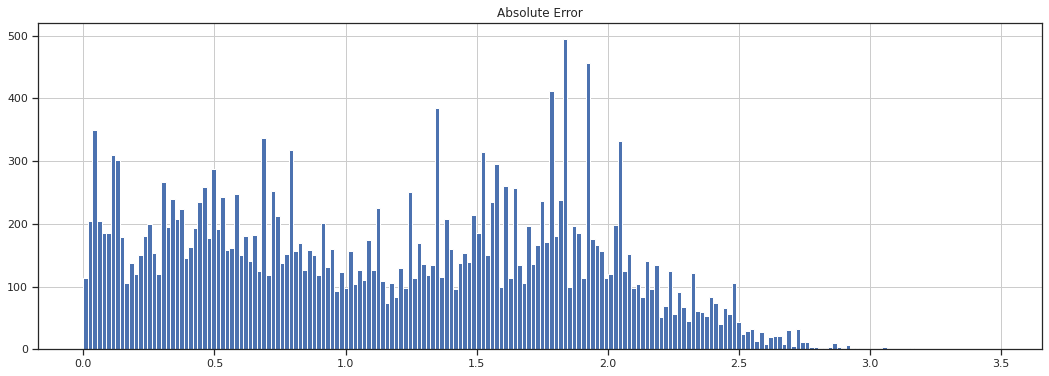

In [206]:
Result_baseline_only.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **Normal Predictor:**

In [207]:
start_np = time.time()
algo_np = recommender('NormalPredictor')

algo_np.fit(trainset)
predictions_np = algo_np.test(testset)

Result_np = get_result(predictions_np,'NormalPredictor')
Result_np
end_np = time.time()
time_dict_of_models['NormalPredictor'] = end_np - start_np

RMSE: 1.9442


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca36710d50>]],
      dtype=object)

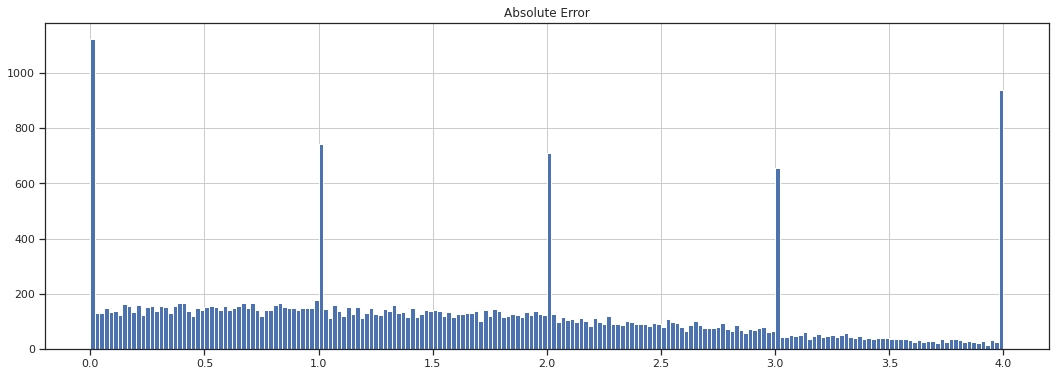

In [208]:
Result_np.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **SVD:**

In [209]:
start_svd = time.time()
algo_svd = recommender('SVD')

algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)

end_svd = time.time()
time_dict_of_models['SVD'] = end_svd - start_svd

In [210]:

Result_svd = get_result(predictions_svd,'SVD')
Result_svd

RMSE: 1.0757


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
11697,A7WR51KERNM6E,B00111DJQ4,1.0,1.000000,1.0,0.000000,1
9203,AK3K19MB191ZO,B000EORV8Q,5.0,5.000000,5.0,0.000000,1
7692,A10PBK14UF9QWI,B0014X2UAK,2.0,1.999976,2.0,0.000024,1
20896,A3RBOGZ91C390Z,B000WEJYM4,3.0,3.000046,3.0,0.000046,1
21183,A22BA49RVGH1A2,B00M76N6MO,2.0,1.999940,2.0,0.000060,1
...,...,...,...,...,...,...,...
22923,A18AVHMIIOP45Q,B00UB76290,1.0,4.271198,4.0,3.271198,0
2711,AQL7NO62AFU4F,B00ISV8ZBY,1.0,4.281513,4.0,3.281513,0
2992,ALFRXNT76PCUY,B00H9A60O4,1.0,4.318105,4.0,3.318105,0
15555,A328GMPMG0IAOZ,B00CG0CMBM,1.0,4.395451,4.0,3.395451,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca36a2ce50>]],
      dtype=object)

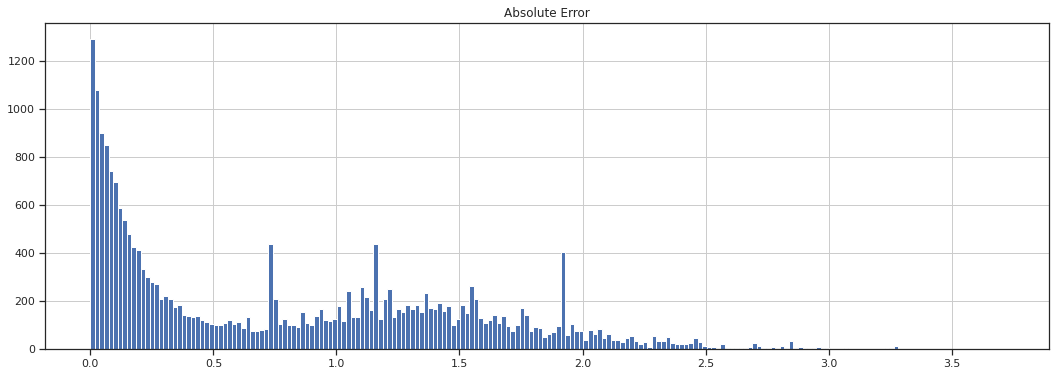

In [211]:
Result_svd.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **SVD++**:


In [212]:
start_svdpp = time.time()
algo_svdpp = recommender('SVDpp')

algo_svdpp.fit(trainset)
predictions_svdpp = algo_svdpp.test(testset)

end_svdpp = time.time()
time_dict_of_models['SVDpp'] = end_svdpp - start_svdpp

In [213]:
Result_svdpp = get_result(predictions_svdpp,'SVDpp')
Result_svdpp

RMSE: 1.0948


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
20618,AL4THBEM8D4J3,B00EZKNYXG,5.0,5.000000,5.0,0.000000,1
19943,AHUT55E980RDR,B00E5UHRIO,5.0,5.000000,5.0,0.000000,1
15175,ALVS0MSXVYIYT,B00EZKNYXG,5.0,5.000000,5.0,0.000000,1
23377,A25JRFD4AG3Q86,B00GOUBT6E,5.0,5.000000,5.0,0.000000,1
5600,A37ZQ97J3FGKQE,B00GOUBT6E,5.0,5.000000,5.0,0.000000,1
...,...,...,...,...,...,...,...
16752,A1TBQR2BY5A8HH,B01F7RJHIQ,1.0,4.916862,5.0,3.916862,0
6701,A5ZUA5B677HZK,B00EZQYC8G,1.0,4.954059,5.0,3.954059,0
5156,AS34BJCBSP7WJ,B00GOUBT6E,1.0,5.000000,5.0,4.000000,0
4281,AMJHMX7OQNG98,B00EZKNYXG,1.0,5.000000,5.0,4.000000,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca36ccca10>]],
      dtype=object)

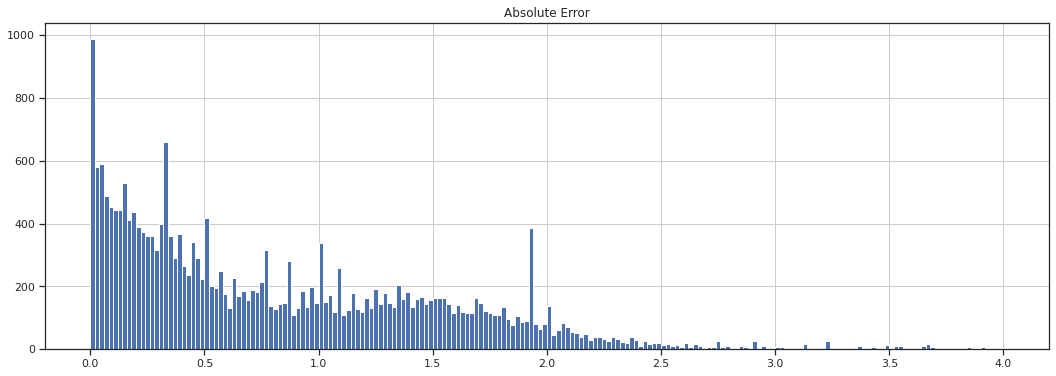

In [214]:
Result_svdpp.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **KNNBaseline**:

In [215]:
start_knn_baseline = time.time()
algo_knn_baseline = recommender('KNNBaseline')

algo_knn_baseline.fit(trainset)
predictions_knn_baseline = algo_knn_baseline.test(testset)


end_knn_baseline = time.time()
time_dict_of_models['KNNBaseline'] = end_knn_baseline - start_knn_baseline

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [216]:
Result_knn_baseline = get_result(predictions_knn_baseline,'KNNBaseline')
Result_knn_baseline

RMSE: 1.0033


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
0,A35X6EJFAHXV1A,B00UB769KC,3.0,3.000000,3.0,0.000000,1
14031,A16N1IRV5IRPWW,B00FYH912C,4.0,4.000000,4.0,0.000000,1
14032,A3H8288VHL1607,B00G0DYKPM,4.0,4.000000,4.0,0.000000,1
14033,A2M09YC0EKT33B,B008YTAGIK,2.0,2.000000,2.0,0.000000,1
14034,A388U9AG6C8EVT,B00BBJR0SO,4.0,4.000000,4.0,0.000000,1
...,...,...,...,...,...,...,...
3118,A3VHYQ0MSE35HJ,B00F8K9MZQ,5.0,1.490964,1.0,3.509036,0
3132,AK8GQ08WTHW4G,B01019T6O0,5.0,1.227126,1.0,3.772874,0
22297,A1UZRFLK2JP6OB,B00PG8FOSY,5.0,1.153948,1.0,3.846052,0
13615,A2OKK2KWZDEO86,B00PG8FOSY,5.0,1.153948,1.0,3.846052,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca65dcb3d0>]],
      dtype=object)

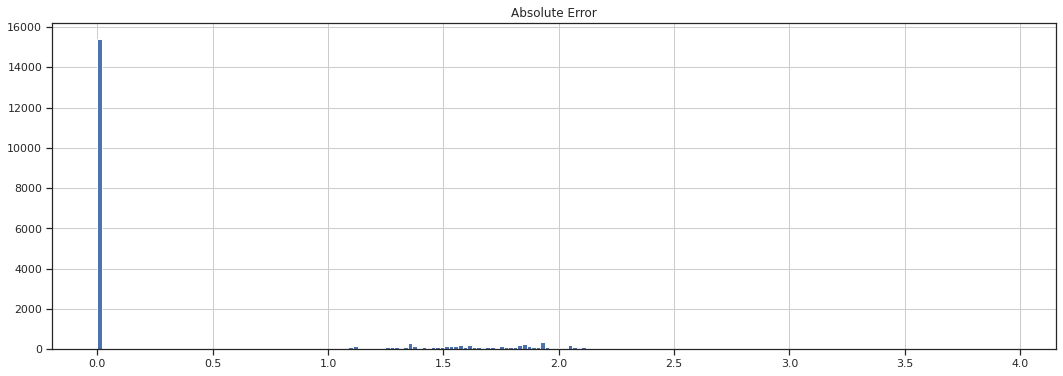

In [217]:
Result_knn_baseline.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **KNNBasic:**

In [218]:
start_knn_basic = time.time()
algo_knn_basic = recommender('KNNBasic')

algo_knn_basic.fit(trainset)
predictions_knn_basic = algo_knn_basic.test(testset)


end_knn_basic = time.time()
time_dict_of_models['KNNBasic'] = end_knn_basic - start_knn_basic

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [219]:
Result_knn_basic = get_result(predictions_knn_basic,'KNNBasic')
Result_knn_basic

RMSE: 1.1009


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
0,A35X6EJFAHXV1A,B00UB769KC,3.0,3.0,3.0,0.0,1
14377,A30EXUC6KL1HZA,B00NG7JVSQ,3.0,3.0,3.0,0.0,1
14376,ARBCGFYLIN51Z,B00A8IZMUM,4.0,4.0,4.0,0.0,1
14374,A2PWDGJ72MH95Q,0842340351,2.0,2.0,2.0,0.0,1
14372,A3ETNI9N49JQOM,B00EZPXOTA,4.0,4.0,4.0,0.0,1
...,...,...,...,...,...,...,...
3118,A3VHYQ0MSE35HJ,B00F8K9MZQ,5.0,1.0,1.0,4.0,0
13615,A2OKK2KWZDEO86,B00PG8FOSY,5.0,1.0,1.0,4.0,0
3132,AK8GQ08WTHW4G,B01019T6O0,5.0,1.0,1.0,4.0,0
19309,A12AVR3WJ4TS9R,B00EZKNYXG,5.0,1.0,1.0,4.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca65e5e290>]],
      dtype=object)

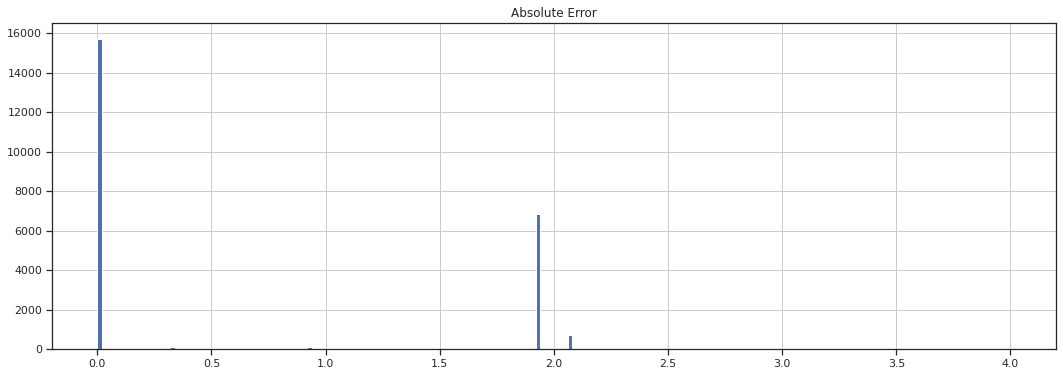

In [220]:
Result_knn_basic.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **KNNWithMeans:**

In [221]:
start_knn_with_means = time.time()
algo_knn_with_means = recommender('KNNWithMeans')

algo_knn_with_means.fit(trainset)
predictions_knn_with_means = algo_knn_with_means.test(testset)


end_knn_with_means = time.time()
time_dict_of_models['KNNWithMeans'] = end_knn_with_means - start_knn_with_means

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [222]:
Result_knn_with_means = get_result(predictions_knn_with_means,'KNNWithMeans')
Result_knn_with_means

RMSE: 1.0966


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
0,A35X6EJFAHXV1A,B00UB769KC,3.0,3.0,3.0,0.0,1
14251,ABNBA3JLHLBOC,B00MEUQUDU,4.0,4.0,4.0,0.0,1
14250,A3RFNZ22PZRVCQ,B005WX2JFO,1.0,1.0,1.0,0.0,1
14248,A209R5FPLZCA9Y,B01326J62G,2.0,2.0,2.0,0.0,1
14246,A1P7AVW0S1KOLG,B0144NYEY6,1.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...
11521,AP4YLGKMJIV0A,B001D1TEIE,5.0,1.0,1.0,4.0,0
6410,A3R2EOGV1NSH41,B00FNXDNB2,5.0,1.0,1.0,4.0,0
7065,AY711KUG8ZRFN,B000W3T6S2,5.0,1.0,1.0,4.0,0
15949,A1P6X48QUMPOPR,B000LROZE4,5.0,1.0,1.0,4.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca36e3ff50>]],
      dtype=object)

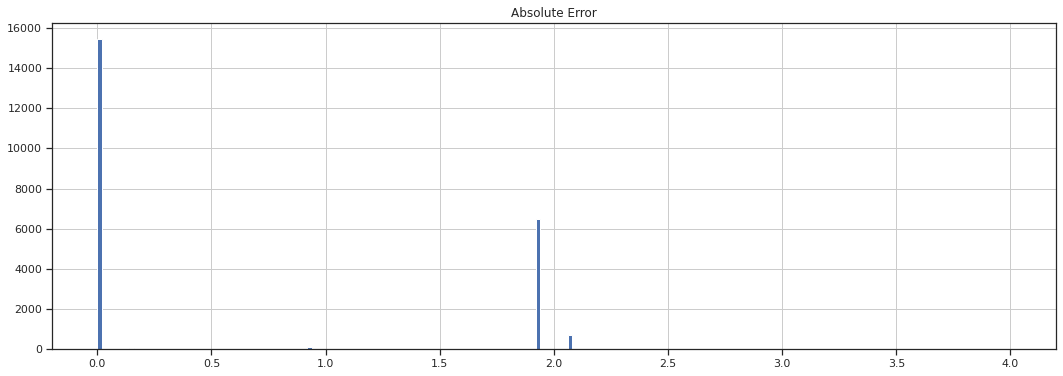

In [223]:
Result_knn_with_means.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **KNNWithZScore:**

In [224]:
start_knn_with_zscore = time.time()
algo_knn_with_zscore = recommender('KNNWithZScore')

algo_knn_with_zscore.fit(trainset)
predictions_knn_with_zscore = algo_knn_with_zscore.test(testset)


end_knn_with_zscore = time.time()
time_dict_of_models['KNNWithZScore'] = end_knn_with_zscore - start_knn_with_zscore

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [225]:
Result_knn_with_zscore = get_result(predictions_knn_with_zscore,'KNNWithZScore')
Result_knn_with_zscore

RMSE: 1.0969


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
0,A35X6EJFAHXV1A,B00UB769KC,3.0,3.0,3.0,0.0,1
14220,A9YJF0OJ4UZWB,B00H9A60O4,3.0,3.0,3.0,0.0,1
14219,A3E1FBSH92UTWB,B00NG7JVSQ,3.0,3.0,3.0,0.0,1
14218,A1HSWMAIKX135L,B01019TDJ8,1.0,1.0,1.0,0.0,1
14217,A2X59V38Q5X1F5,B01637RPPQ,4.0,4.0,4.0,0.0,1
...,...,...,...,...,...,...,...
20701,A1A48TI3C3539G,B00CM1O5ME,5.0,1.0,1.0,4.0,0
13171,A1ISWQNH7U3GEX,B0067STH5S,5.0,1.0,1.0,4.0,0
11521,AP4YLGKMJIV0A,B001D1TEIE,5.0,1.0,1.0,4.0,0
7065,AY711KUG8ZRFN,B000W3T6S2,5.0,1.0,1.0,4.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca37064350>]],
      dtype=object)

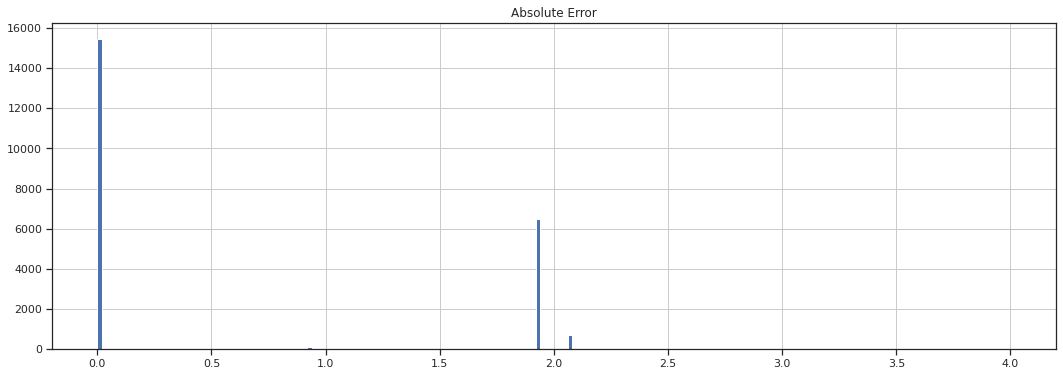

In [226]:
Result_knn_with_zscore.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **Non-Negative Matrix Factorization:**

In [227]:
start_nmf = time.time()
algo_nmf = recommender('NMF')

algo_nmf.fit(trainset)
predictions_nmf = algo_nmf.test(testset)


end_nmf = time.time()
time_dict_of_models['NMF'] = end_nmf - start_nmf

In [228]:
Result_nmf = get_result(predictions_nmf,'NMF')
Result_nmf

RMSE: 1.0868


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
12049,A3VUHYSEPPMSD8,B0144NYGJY,5.0,5.0,5.0,0.0,1
17429,A2YJSERPFWV34V,B006O8MA7S,1.0,1.0,1.0,0.0,1
4030,ACT7GOR4SM0KK,B00M7YB0UG,1.0,1.0,1.0,0.0,1
22157,A215BR2SEAKAAL,B006G9ARX4,1.0,1.0,1.0,0.0,1
17420,A2WMA3JZ6TZ2G5,B000068NKQ,5.0,5.0,5.0,0.0,1
...,...,...,...,...,...,...,...
19867,A3CHGMD8IDRNIK,B00E6LJAOG,5.0,1.0,1.0,4.0,0
15788,A1O8UB1KVF7JZ5,B00UB76290,5.0,1.0,1.0,4.0,0
1346,A23H5IN14G6TSD,B00BBJR0SO,5.0,1.0,1.0,4.0,0
4793,AAMG9Z00QSL0U,B00F8K9N1E,5.0,1.0,1.0,4.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca3719f450>]],
      dtype=object)

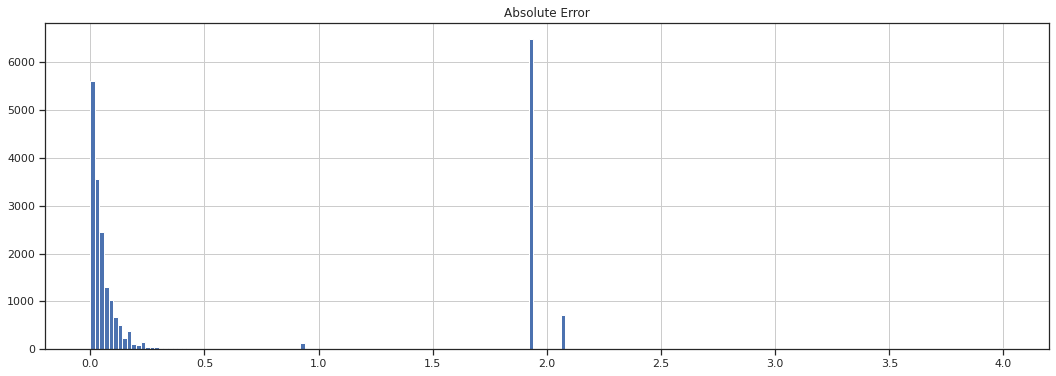

In [229]:
Result_nmf.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **SlopeOne**:

In [230]:
start_slope_one = time.time()
algo_slope_one = recommender('SlopeOne')

algo_slope_one.fit(trainset)
predictions_slope_one = algo_slope_one.test(testset)


end_slope_one = time.time()
time_dict_of_models['SlopeOne'] = end_slope_one - start_slope_one

In [231]:
Result_slope_one = get_result(predictions_slope_one,'SlopeOne')
Result_slope_one

RMSE: 1.0790


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
0,A35X6EJFAHXV1A,B00UB769KC,3.0,3.0,3.0,0.0,1
14609,AQ6FCLH86JLPG,B00UB76290,1.0,1.0,1.0,0.0,1
14608,AS3WM994LL39E,B0056CZC2S,4.0,4.0,4.0,0.0,1
14607,AY4IKUGL9FQKA,B006GOFW3E,3.0,3.0,3.0,0.0,1
14605,A2VQFRDFWOCV2H,B00M77U58Q,2.0,2.0,2.0,0.0,1
...,...,...,...,...,...,...,...
11421,AJRFDI7L8F10,B018UHBZSA,5.0,1.0,1.0,4.0,0
13306,A2PDJ0CV3M379D,B00EZPXYP4,5.0,1.0,1.0,4.0,0
10338,AXY5RZY2TZBTM,B00H9A60O4,1.0,5.0,5.0,4.0,0
1346,A23H5IN14G6TSD,B00BBJR0SO,5.0,1.0,1.0,4.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca30aadf90>]],
      dtype=object)

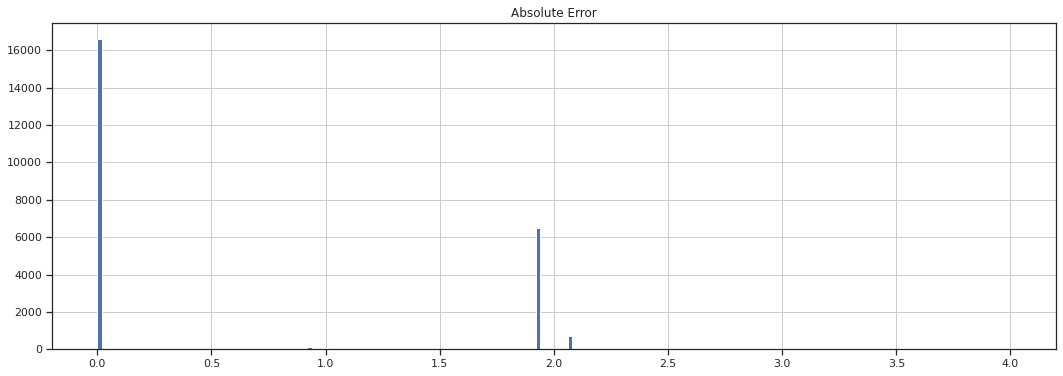

In [232]:
Result_slope_one.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **CoClustering:**

In [233]:
start_coclustering = time.time()
algo_coclustering = recommender('CoClustering')

algo_coclustering.fit(trainset)
predictions_coclustering = algo_coclustering.test(testset)

end_coclustering = time.time()
time_dict_of_models['CoClustring'] = end_coclustering - start_coclustering

In [234]:

Result_coclustering = get_result(predictions_coclustering,'CoClustering')
Result_coclustering

RMSE: 1.2026


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
15093,AQ1WZTA35NFDI,B00BBJQX64,1.0,1.0,1.0,0.0,1
3550,A2JEI7NC94Z4PN,B00002S8RA,1.0,1.0,1.0,0.0,1
13473,ABCOWVQ9FQMU2,B01326J6GW,1.0,1.0,1.0,0.0,1
13471,A2HSRTADCT7W1R,B0007SN5WK,1.0,1.0,1.0,0.0,1
13456,ARPQ03XMI06M9,B00PG8FSYE,1.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...
10338,AXY5RZY2TZBTM,B00H9A60O4,1.0,5.0,5.0,4.0,0
19867,A3CHGMD8IDRNIK,B00E6LJAOG,5.0,1.0,1.0,4.0,0
21623,A1US7RV6WDB8ZQ,B01637RJFM,1.0,5.0,5.0,4.0,0
187,A2FNLHIZNO65ED,B00FZ0E0HE,1.0,5.0,5.0,4.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca63683410>]],
      dtype=object)

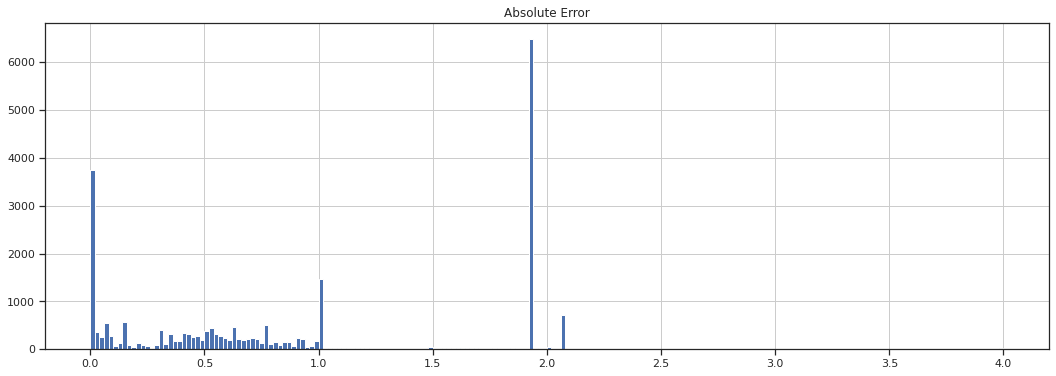

In [235]:
Result_coclustering.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **Tabulated Results of Algorithms and the RMSE obtained:**

In [236]:
algorithms = list(accuracy_scores.keys())
rmse_values = list(rmse_scores.values())
accuracy_values = list(accuracy_scores.values())
mean_absolute_error_values = list(mean_absolute_error.values())
time_taken_by_models_in_seconds = list(time_dict_of_models.values())
no_of_algos = len(algorithms)

tabular_summary = pd.DataFrame({"Recommender Algorithm":algorithms, 
                                "RMSE":rmse_values, "MAE":mean_absolute_error_values, "Accuracy (in %)": accuracy_values,
                                "Time taken to fit and test (in seconds)":time_taken_by_models_in_seconds},
                               index=list(range(1,no_of_algos+1)))
sorted_tabular_summary = tabular_summary.sort_values(by = 'Accuracy (in %)',ascending=False)

sorted_tabular_summary.index = list(range(1,no_of_algos+1))

cm = sns.light_palette("#2ecc90", as_cmap=True)


styler = sorted_tabular_summary.style
styler = styler.set_table_styles([{'selector': 'th', 'props': [('font-size', '16pt')]}])
styler = styler.set_properties(**{'text-align': 'center','font-size': '14pt','width':'260px'})
# styler = styler.background_gradient(cmap=cm)
styler = styler.set_precision(4)
display(styler)

,Recommender Algorithm,RMSE,MAE,Accuracy (in %),Time taken to fit and test (in seconds)
1,SlopeOne,1.0790,0.5975,68.9420,1.8526
2,NMF,1.0868,0.6428,67.9580,13.2907
3,KNNBaseline,1.0033,0.5669,66.7755,3.8386
4,KNNWithZScore,1.0969,0.6323,66.6598,1.9796
5,KNNWithMeans,1.0966,0.6323,66.6515,1.6465
6,KNNBasic,1.1009,0.6356,66.6143,1.5323
7,SVD,1.0757,0.8035,45.7725,7.4287
8,SVDpp,1.0948,0.8311,43.8293,15.8069
9,CoClustering,1.2026,0.9184,37.7434,9.8209
10,BaselineOnly,1.3653,1.1667,23.5209,1.2418


# **Comparison of algorithms using RMSE:**

[Text(0, 0.5, 'Root Mean Squared Error'),
 Text(0.5, 0, 'Recommender Algorithm')]

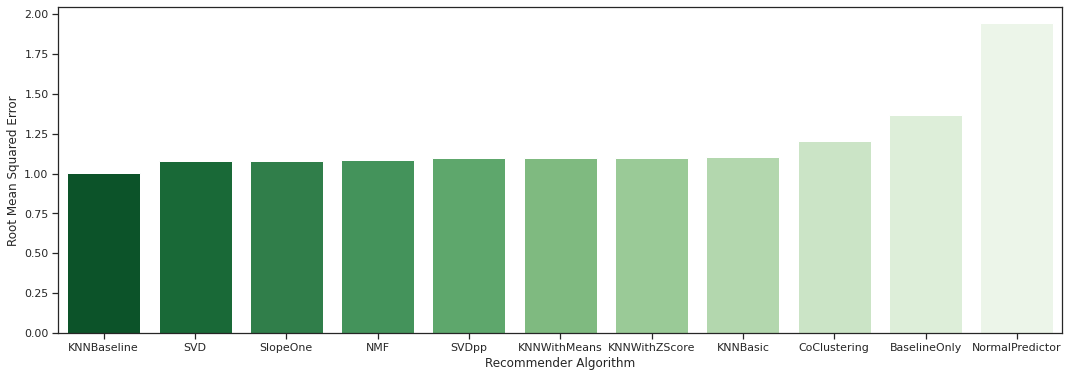

In [237]:
import matplotlib.pyplot as plt

Algorithm_Used = sorted(rmse_scores, key = rmse_scores.get)
RMSE_values = sorted(rmse_scores.values())

fig = plt.figure(figsize = (18, 6))
ax = sns.barplot(x = Algorithm_Used, y = RMSE_values, palette='Greens_r')
ax.set(xlabel='Recommender Algorithm', ylabel='Root Mean Squared Error')


# **Comparison of algorithms using MAE:**

[Text(0, 0.5, 'Mean Absolute Error'), Text(0.5, 0, 'Recommender Algorithm')]

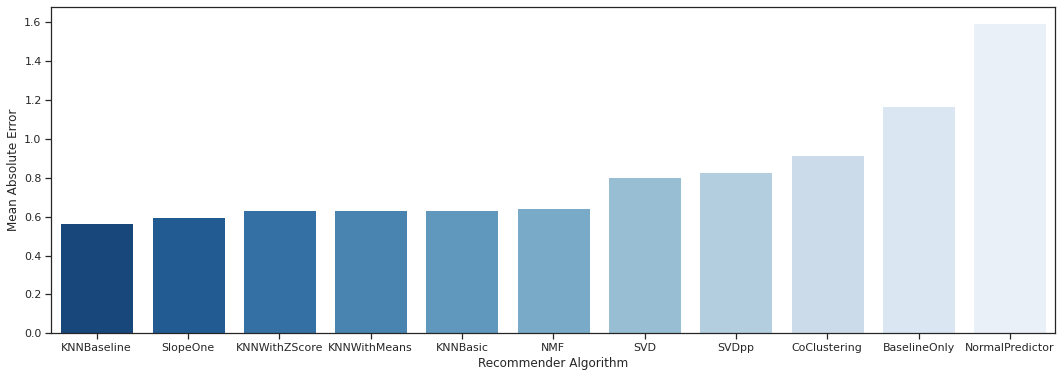

In [238]:

Algorithm_Used = sorted(mean_absolute_error, key = mean_absolute_error.get)
MAE_values = sorted(mean_absolute_error.values())
fig = plt.figure(figsize = (18, 6))
ax = sns.barplot(x = Algorithm_Used, y = MAE_values, palette='Blues_r')
ax.set(xlabel='Recommender Algorithm', ylabel='Mean Absolute Error')


 


# **Comparison of algorithms using accuracy:** 

[Text(0, 0.5, 'Accuracy (in %)'), Text(0.5, 0, 'Recommender Algorithm')]

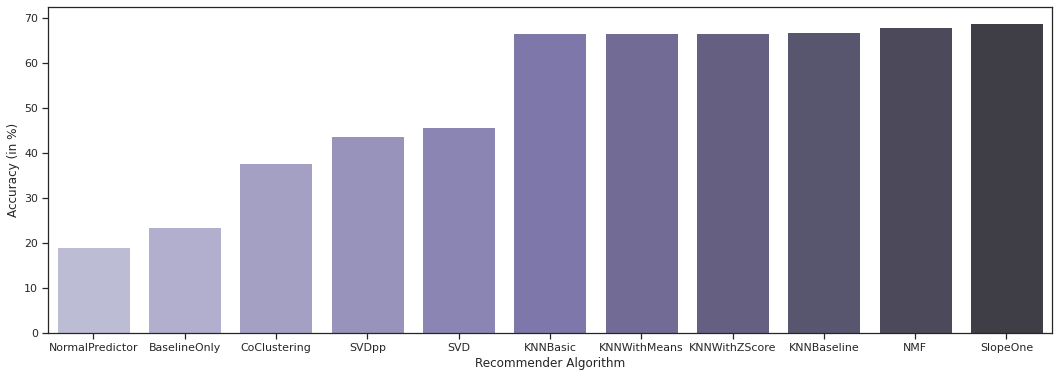

In [239]:

Algorithm_Used = sorted(accuracy_scores, key = accuracy_scores.get)
Accuracy_values = sorted(accuracy_scores.values())

fig = plt.figure(figsize = (18, 6))
ax = sns.barplot(x = Algorithm_Used, y = Accuracy_values, palette='Purples_d')
ax.set(xlabel='Recommender Algorithm', ylabel='Accuracy (in %)')


# **Predicting top 'n' products for a user:**

top_n_recommender is a function that has 3 parameters. 
user_id is an input user_id for whom we want to recommend products.\
n_parameter is the number of 'top n' products we want to recommend.
chosen_algo is the algorithm that'll be used from surpriseLib for the predictions. 
The general idea used here, was to create a test set which comprises of all (user_id, item_id) combinations. That is, we are trying to predict the user_id's ratings for ALL items in our dataset. The predicted ratings are then sorted in descending order, and the top 'n_parameter' products are recommended.

If the user_id is not in the data set, 'Data of this user is unavailable' is displayed.

In [240]:
def top_n_recommender(user_id, n_parameter, chosen_algo):
  my_seed = 0
  random.seed(my_seed)
  np.random.seed(my_seed)

  #lists all users in our data set
  users_of_amazon_dataset = np.unique(merged_data['reviewerID'])
  # if input user_id is not in our amazon data set, return the message
  if user_id not in users_of_amazon_dataset:
    return "Data of this user is unavailable"

  # items is a list of all products in our training data 
  items = np.unique(merged_data['Item ID'])

  # user column just replicates the input user id, len(items) times
  user_column = np.tile(user_id,len(items))

  # initializing the ratings column with zero
  ratings_column = len(items) * [0]

  test_data_frame = pd.DataFrame({"USER":user_column, "ITEM ID":items, "RATING":ratings_column})

  reader = Reader(rating_scale=(1, 5))

  # data = Dataset.load_from_df(surprise_data_balanced, reader)

  # trainset, testset = train_test_split(data, test_size=.25,random_state=42)

  test_set_data = Dataset.load_from_df(test_data_frame, reader)
  trainset_pseudo, test_set_to_be_used = train_test_split(test_set_data, test_size=1.0,random_state=42)


  # CHOOSE ALGORITHM TO IMPLEMENT
  if chosen_algo == 'SVD':
    predicted_ratings = algo_svd.test(test_set_to_be_used)
  elif chosen_algo == 'SVDpp':
    predicted_ratings = algo_svdpp.test(test_set_to_be_used)
  elif chosen_algo == 'NMF':
    predicted_ratings = algo_nmf.test(test_set_to_be_used)
  elif chosen_algo == 'SlopeOne':
    predicted_ratings = algo_slope_one.test(test_set_to_be_used)
  elif chosen_algo == 'CoClustering':
    predicted_ratings = algo_coclustering.test(test_set_to_be_used)
  elif chosen_algo == 'KNNBasic':
    predicted_ratings = algo_knn_basic.test(test_set_to_be_used)
  elif chosen_algo == 'KNNWithZScore':
    predicted_ratings = algo_knn_with_zscore.test(test_set_to_be_used)
  elif chosen_algo == 'KNNBaseline':
    predicted_ratings = algo_knn_baseline.test(test_set_to_be_used)   
  elif chosen_algo == 'KNNWithMeans':
    predicted_ratings = algo_knn_with_means.test(test_set_to_be_used)
  elif chosen_algo == 'BaselineOnly':
    predicted_ratings = algo_baseline_only.test(test_set_to_be_used)
  elif chosen_algo == 'NormalPredictor':
    predicted_ratings = algo_np.test(test_set_to_be_used)

  n = len(predicted_ratings)

  User_ID=n*[0]
  Item_ID=n*[0]
  Predicted_Rating=n*[0]
  for i in range(n):
    User_ID[i] = predicted_ratings[i].uid
    Item_ID[i] = predicted_ratings[i].iid
    Predicted_Rating[i] = predicted_ratings[i].est 


  Result = pd.DataFrame({"User ID":User_ID,"Item ID":Item_ID,
                           "Predicted Rating":Predicted_Rating})
  
  Result = Result.sort_values(by = 'Predicted Rating',ascending=False)

  table = Result.head(n_parameter)

  pretty_result = pd.merge(software_metadata, table, on ='Item ID')
  pretty_result = pd.DataFrame({"Product ID": pretty_result['Item ID'],"Title": pretty_result['title'],
                              "Brand":pretty_result['brand'],"Predicted Rating":pretty_result['Predicted Rating']})
  pretty_result = pretty_result.drop_duplicates()

  pretty_result = pretty_result.sort_values(by = 'Predicted Rating',ascending = False)

  pretty_result.reset_index(drop=True, inplace=True)

  return pretty_result

In [241]:
top_n_recommender('AQ1WZTA35NFDI',5,'SlopeOne')


,Product ID,Title,Brand,Predicted Rating
0,B004RQ4FVS,PrimaSoft Small Library Organizer Pro - Softwa...,PrimaSoft PC,3.077222
1,B006L7KYUM,BuzzEdit v3 - Embroidery Design Editor,Buzz Tools,3.077222
2,B00FZ0FQKY,Webroot Internet Security Plus 2016 | 3 Device...,Webroot,3.077222
3,B00J2EZJM4,Backblaze - Online Backup PC [Online Code],by\n \n Backblaze,3.077222
4,B00OM6SMSU,Bitdefender Antivirus Plus Value Edition - 3 U...,Bitdefender,3.077222


In [242]:
top_n_recommender('AQ1WZTA35NFDI',5,'CoClustering')

,Product ID,Title,Brand,Predicted Rating
0,B000BLRXQC,TONKA GARAGE JC,Hasbro,5.0
1,B001B010PC,Nikon Capture NX 2 Upgrade from Capture NX 1.x,Nikon,5.0
2,B005JV7IWI,Learn Microsoft Office 2007 - Video Training T...,Simon Sez IT,5.0
3,B00B1JWWDM,Web Freelancer Contract Pack - Legal Contract ...,Proposal Kit,5.0
4,B00E3EN7DQ,Corel Painter X3 Upgrade for Mac [Download],Corel,5.0


In [243]:
top_n_recommender('XYZ123',10,'SlopeOne')


'Data of this user is unavailable'

In [244]:
top_n_recommender('A20DZX38KRBIT8',10,'SVD')

'Data of this user is unavailable'

In [245]:
top_n_recommender('AZZ69W8AU7WTR',10,'CoClustering')

'Data of this user is unavailable'

top_n_recommender_best(user_id,n) recommends top 'n' products for the given user_id by calling the 'SlopeOne' algorithm, since it had the best accuracy.

In [246]:
def top_n_recommender_best(user_id,n):
  return top_n_recommender(user_id,n,'SlopeOne')

display_past_user_data(user_id) displays a data frame of all products that the user rated previously, sorted in descending order of Ratings.

In [247]:
def display_past_user_data(user_id):
  grouped_merged_data = merged_data.groupby('reviewerID')
  past_user_data = grouped_merged_data.get_group(user_id)
  past_user_data = past_user_data.drop(columns=['verified','style','reviewText','summary','also_buy','also_view','rank'])
  past_user_data = pd.DataFrame({"User ID":past_user_data['reviewerID'], "Item ID": past_user_data['Item ID'],
                                 "Title": past_user_data['title'],"Brand": past_user_data['brand'],"Rating":past_user_data['overall']})
  past_user_data_sorted = past_user_data.sort_values(by='Rating')
  past_user_data_sorted = past_user_data_sorted.drop_duplicates() 
  return past_user_data_sorted

display_past_user_data_top_n(user_id,n) displays the 'top n' products that the user rated previously.

In [248]:
def display_past_user_data_top_n(user_id,n):
  past_df = display_past_user_data(user_id)
  past_df = past_df.sort_values(by='Rating',ascending = False)

  return past_df.head(n)

get_no_of_items_previously_rated(user_id) returns the number of items that the given user_id previously rated.

In [249]:
def get_no_of_items_previously_rated(user_id):
  past_df = display_past_user_data(user_id)

  return len(past_df)


In [250]:
def evaluate(user_id,n):

  top_n_df = top_n_recommender_best(user_id,n)
  past_user_data_top_n_df = display_past_user_data_top_n(user_id,n)
  count = 0
  for index, row in top_n_df.iterrows():

    for index_, row_ in past_user_data_top_n_df.iterrows():
      if row['Product ID'] == row_['Item ID']:
        count+=1

  print("Out of",len(past_user_data_top_n_df),"previously rated top items of user",user_id,",",count,"items were found.")
  


evaluator(user_id,n) returns that out of 'n' items that were recommended to the given user_id, how many items were previously rated ones.

In [251]:
def evaluator(user_id,n):
  top_n_df = top_n_recommender_best(user_id,n)
  past_user_data = display_past_user_data(user_id)
  count = 0
  for index, row in top_n_df.iterrows():
    for index_, row_ in past_user_data.iterrows():
      if row['Product ID'] == row_['Item ID']:
        count+=1
        break

  Number_of_items_out_of_n_that_are_previously_rated = count

  return Number_of_items_out_of_n_that_are_previously_rated
  

evaluator_by_algo(user_id,n,chosen_algo) returns that out of 'n' items that were recommended to the given user_id, how many items were previously rated ones, when the algorithm used for recommendations is 'chosen_algo'. This function will help us evaluate all the individual algorithms of surpriseLib later.

In [252]:
def evaluator_by_algo(user_id,n,chosen_algo):
  top_n_df = top_n_recommender(user_id,n,chosen_algo)
  past_user_data = display_past_user_data(user_id)
  count = 0
  for index, row in top_n_df.iterrows():
    for index_, row_ in past_user_data.iterrows():
      if row['Product ID'] == row_['Item ID']:
        count+=1
        break

  Number_of_items_out_of_n_that_are_previously_rated = count

  return Number_of_items_out_of_n_that_are_previously_rated

In [253]:
display_past_user_data('A2L6LPQOBU381J')

,User ID,Item ID,Title,Brand,Rating
48949,A2L6LPQOBU381J,B001GL8UP4,TurboTax Home &amp; Business Federal + State +...,Intuit,5.0


In [254]:
display_past_user_data_top_n('A2L6LPQOBU381J',5)

,User ID,Item ID,Title,Brand,Rating
48949,A2L6LPQOBU381J,B001GL8UP4,TurboTax Home &amp; Business Federal + State +...,Intuit,5.0


In [255]:
top_n_recommender_best('A2L6LPQOBU381J',5)

,Product ID,Title,Brand,Predicted Rating
0,B00004NHKU,Arthurs Computer Adventure Ages 3-7 [OLD VERS...,The Learning Company,5.0
1,B00008LDI0,Pinnacle My MP3 Pro,Pinnacle Systems,5.0
2,B000H6ME6A,High School Learning System 2007 (Win/Mac),FOGWARE,5.0
3,B007IWCXHG,CorelDRAW Graphics Suite X6 Education Edition ...,Corel,5.0
4,B00X84I6RO,WinZip 19 21 Day Free Trial [Download] (Old),Corel,5.0


In [256]:
evaluate('A2L6LPQOBU381J',5)

Out of 1 previously rated top items of user A2L6LPQOBU381J , 0 items were found.


In [257]:
# Number of previously rated items found by the recommender
evaluator('A2L6LPQOBU381J',5)

0

count_of_items_previously_rated is a dictionary where the keys are the user_id's and the values are the number of products that the user has rated.

In [258]:
count_of_items_previously_rated = dict(merged_data['reviewerID'].value_counts())
print(count_of_items_previously_rated)

{'A3W4D8XOGLWUN5': 15, 'A31N0XY2UTB25C': 14, 'AKHPBCJ0PKGUH': 12, 'A1BT5SR5MTZK4V': 7, 'A225G2TFM76GYX': 7, 'A125ZNOVIZTWNN': 6, 'A3N0BL9B0UGELE': 6, 'A216Z266WSNL4S': 6, 'A3NMEF3MJ0A3PL': 6, 'A14V7Y1TE21VT3': 6, 'A2DV14M0BC6YY1': 5, 'A34VV0DDR0OFE5': 5, 'AGBZ9NGMQHN1I': 5, 'A3QIL8U6CTYW1G': 5, 'AM13JILBPTHYF': 5, 'A1T1YSCDW0PD25': 5, 'ANFRSLQ583FE4': 5, 'A23E9QQHJLNGUI': 5, 'A3BVN2QBNPBHCR': 5, 'A29HEP4USHKWM8': 5, 'A1J9LW078SZFQQ': 5, 'A2D8O4ANMAXKNX': 5, 'AVR7IAWO7Z0VQ': 4, 'A3NER7NAGE01A2': 4, 'A6IWM46434IHP': 4, 'ADQMD5JY576CU': 4, 'A2WCFDOCS73PNB': 4, 'A2AGUG8B7T7DP4': 4, 'A1G8RES4IB05KH': 4, 'A680RUE1FDO8B': 4, 'A17SZSS60ZCMN4': 4, 'AB85CL2OC4SHS': 4, 'A6M01NDCD957E': 4, 'A2WQ8385K60P5B': 4, 'A34NQ4MVWX07F9': 4, 'A2RETV018GX3R2': 4, 'A230ESISU6PB': 4, 'AZD8SMNGQI98O': 4, 'AG7ZY2LM10Z6K': 4, 'ASYKUKD5MW46V': 4, 'AWGWBLW1SRPG6': 4, 'A27ILJBXASTK2F': 4, 'A10S3TPJ3WUPHF': 4, 'AO4TRO9LF3YS8': 4, 'A26KP2VSFE7GQ3': 4, 'A2YKWYC3WQJX5J': 4, 'A37LQQJNYCGHAE': 4, 'A2OPWMG3XM3W1T': 4, 'A2DR

In [259]:
# Filtering the dictionary to retain only those users who rate more than 5 items.

filtered_dict = dict(filter(lambda x: x[1] >= 5,count_of_items_previously_rated.items()))
print(filtered_dict)

{'A3W4D8XOGLWUN5': 15, 'A31N0XY2UTB25C': 14, 'AKHPBCJ0PKGUH': 12, 'A1BT5SR5MTZK4V': 7, 'A225G2TFM76GYX': 7, 'A125ZNOVIZTWNN': 6, 'A3N0BL9B0UGELE': 6, 'A216Z266WSNL4S': 6, 'A3NMEF3MJ0A3PL': 6, 'A14V7Y1TE21VT3': 6, 'A2DV14M0BC6YY1': 5, 'A34VV0DDR0OFE5': 5, 'AGBZ9NGMQHN1I': 5, 'A3QIL8U6CTYW1G': 5, 'AM13JILBPTHYF': 5, 'A1T1YSCDW0PD25': 5, 'ANFRSLQ583FE4': 5, 'A23E9QQHJLNGUI': 5, 'A3BVN2QBNPBHCR': 5, 'A29HEP4USHKWM8': 5, 'A1J9LW078SZFQQ': 5, 'A2D8O4ANMAXKNX': 5}


In [260]:
len(filtered_dict)

22

In [261]:
user_column = filtered_dict.keys()
user_column

dict_keys(['A3W4D8XOGLWUN5', 'A31N0XY2UTB25C', 'AKHPBCJ0PKGUH', 'A1BT5SR5MTZK4V', 'A225G2TFM76GYX', 'A125ZNOVIZTWNN', 'A3N0BL9B0UGELE', 'A216Z266WSNL4S', 'A3NMEF3MJ0A3PL', 'A14V7Y1TE21VT3', 'A2DV14M0BC6YY1', 'A34VV0DDR0OFE5', 'AGBZ9NGMQHN1I', 'A3QIL8U6CTYW1G', 'AM13JILBPTHYF', 'A1T1YSCDW0PD25', 'ANFRSLQ583FE4', 'A23E9QQHJLNGUI', 'A3BVN2QBNPBHCR', 'A29HEP4USHKWM8', 'A1J9LW078SZFQQ', 'A2D8O4ANMAXKNX'])

In [262]:
no_of_items_previously_rated = filtered_dict.values()
no_of_items_previously_rated

dict_values([15, 14, 12, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [263]:
top_5_metrics = []
top_10_metrics = []
top_15_metrics = []
user_df_col = []

for user in user_column:
  top_5_val = evaluator(user,5)
  top_10_val = evaluator(user,10)
  top_15_val = evaluator(user,15)

  top_5_metrics.append(top_5_val)
  top_10_metrics.append(top_10_val)
  top_15_metrics.append(top_15_val)

  user_df_col.append(user)

In [264]:
evaluate_df = pd.DataFrame({"USER ID": user_column, "Number of previously rated items in Top 5": top_5_metrics, 
                            "Number of previously rated items in Top 10": top_10_metrics, 
                            "Number of previously rated items in Top 15": top_15_metrics, 
                            "No. of items previously rated": no_of_items_previously_rated})

evaluate_df shows us that for the 'SlopeOne' algorithm, for all users that had rated at least 5 items, how many products were previously rated in each of their 'Top 5', 'Top 10', 'Top 15' recommendations.

In [265]:
evaluate_df

,USER ID,Number of previously rated items in Top 5,Number of previously rated items in Top 10,Number of previously rated items in Top 15,No. of items previously rated
0,A3W4D8XOGLWUN5,0,0,2,15
1,A31N0XY2UTB25C,3,4,4,14
2,AKHPBCJ0PKGUH,4,5,5,12
3,A1BT5SR5MTZK4V,0,0,0,7
4,A225G2TFM76GYX,2,3,3,7
5,A125ZNOVIZTWNN,0,0,0,6
6,A3N0BL9B0UGELE,0,0,0,6
7,A216Z266WSNL4S,1,2,2,6
8,A3NMEF3MJ0A3PL,0,0,0,6
9,A14V7Y1TE21VT3,2,3,3,6


In [266]:
mean_number_of_prev_rated_items_in_top_5 = evaluate_df['Number of previously rated items in Top 5'].mean()
mean_number_of_prev_rated_items_in_top_10 = evaluate_df['Number of previously rated items in Top 10'].mean()
mean_number_of_prev_rated_items_in_top_15 = evaluate_df['Number of previously rated items in Top 15'].mean()

In [267]:
print("The mean Number of previously rated items in the top 5 recommended products is:", round(mean_number_of_prev_rated_items_in_top_5,4))

The mean Number of previously rated items in the top 5 recommended products is: 0.9545


In [268]:
print("The mean Number of previously rated items in the top 10 recommended products is:", round(mean_number_of_prev_rated_items_in_top_10,4) )

The mean Number of previously rated items in the top 10 recommended products is: 1.2273


In [269]:
print("The mean Number of previously rated items in the top 15 recommended products is:", round(mean_number_of_prev_rated_items_in_top_15,4) )

The mean Number of previously rated items in the top 15 recommended products is: 1.3182


# **Category based recommender:**

top_n_products_by_category(n_parameter,category,user_id,chosen_algo) returns the best 'n_parameter' products for a given 'user_id', from the input 'category' when the algorithm used for making recommendation is 'chosen_algo'. The idea used here was to create a test set comprising of all combinations of (user_id,item_id), where the user_id is the input user_id, and item_id's are ALL items that are from the input 'category'. The items are then sorted in descending order of predicted ratings and the top 'n_paramater' items are displayed.

In [270]:
def top_n_products_by_category(n_parameter,category,user_id,chosen_algo):
  my_seed = 0
  random.seed(my_seed)
  np.random.seed(my_seed)

  if category not in final_list_of_categories:
    return "Category is not present"

  #lists all users in our data set
  users_of_amazon_dataset = np.unique(merged_data['reviewerID'])
  # if input user_id is not in our amazon data set, return the message
  if user_id not in users_of_amazon_dataset:
    return "Data of this user is unavailable"

  merged_data_filtered_by_category = merged_data[merged_data['Category of Software'] == category]

  # items is a list of all products in our training data, filtered by the chosen category
  items = np.unique(merged_data_filtered_by_category['Item ID'])

  # user column just replicates the input user id, len(items) times
  user_column = np.tile(user_id,len(items))

  # initializing the ratings column with zero
  ratings_column = len(items) * [0]

  test_data_frame = pd.DataFrame({"USER":user_column, "ITEM ID":items, "RATING":ratings_column})

  reader = Reader(rating_scale=(1, 5))

  # data = Dataset.load_from_df(surprise_data_balanced, reader)

  # trainset, testset = train_test_split(data, test_size=.25,random_state=42)

  test_set_data = Dataset.load_from_df(test_data_frame, reader)
  trainset_pseudo, test_set_to_be_used = train_test_split(test_set_data, test_size=1.0,random_state=42)


  # CHOOSE ALGORITHM TO IMPLEMENT
  if chosen_algo == 'SVD':
    predicted_ratings = algo_svd.test(test_set_to_be_used)
  elif chosen_algo == 'SVDpp':
    predicted_ratings = algo_svdpp.test(test_set_to_be_used)
  elif chosen_algo == 'NMF':
    predicted_ratings = algo_nmf.test(test_set_to_be_used)
  elif chosen_algo == 'SlopeOne':
    predicted_ratings = algo_slope_one.test(test_set_to_be_used)
  elif chosen_algo == 'CoClustering':
    predicted_ratings = algo_coclustering.test(test_set_to_be_used)
  elif chosen_algo == 'KNNBasic':
    predicted_ratings = algo_knn_basic.test(test_set_to_be_used)
  elif chosen_algo == 'KNNWithZScore':
    predicted_ratings = algo_knn_with_zscore.test(test_set_to_be_used)
  elif chosen_algo == 'KNNBaseline':
    predicted_ratings = algo_knn_baseline.test(test_set_to_be_used)   
  elif chosen_algo == 'KNNWithMeans':
    predicted_ratings = algo_knn_with_means.test(test_set_to_be_used)
  elif chosen_algo == 'BaselineOnly':
    predicted_ratings = algo_baseline_only.test(test_set_to_be_used)
  elif chosen_algo == 'NormalPredictor':
    predicted_ratings = algo_np.test(test_set_to_be_used)

  n = len(predicted_ratings)

  User_ID=n*[0]
  Item_ID=n*[0]
  Predicted_Rating=n*[0]
  for i in range(n):
    User_ID[i] = predicted_ratings[i].uid
    Item_ID[i] = predicted_ratings[i].iid
    Predicted_Rating[i] = predicted_ratings[i].est 


  Result = pd.DataFrame({"User ID":User_ID,"Item ID":Item_ID,
                           "Predicted Rating":Predicted_Rating})
  
  Result = Result.sort_values(by = 'Predicted Rating',ascending=False)

  table = Result.head(n_parameter)

  pretty_result = pd.merge(merged_data, table, on ='Item ID')
  pretty_result = pd.DataFrame({"Product ID": pretty_result['Item ID'],"Title": pretty_result['title'],
                              "Brand":pretty_result['brand'],"Category":pretty_result['Category of Software'],
                              "Predicted Rating":pretty_result['Predicted Rating']})
  pretty_result = pretty_result.drop_duplicates()

  pretty_result = pretty_result.sort_values(by = 'Predicted Rating',ascending = False)

  pretty_result.reset_index(drop=True, inplace=True)

  return pretty_result

In [271]:
top_n_products_by_category(5,'Design & Illustration','A3W4D8XOGLWUN5','SVD')

,Product ID,Title,Brand,Category,Predicted Rating
0,B00BYII3KQ,SketchBook Pro 6 [Old Version],Autodesk,Design & Illustration,4.639885
1,B001NK18FM,Manga Studio EX 4,Smith Micro Software Inc.,Design & Illustration,4.376650
2,B00E1L1P5I,Manga Studio EX 5,Smith Micro Software Inc.,Design & Illustration,4.372417
3,B01F70HHBC,CLIP STUDIO PAINT EX,Smith Micro Software Inc.,Design & Illustration,4.199014
4,B007H083NC,Snagit 11 - Windows 11.2 / Mac 2.1 version or...,TechSmith,Design & Illustration,4.166469


top_n_products_by_category_best(user_id, n_parameter, category) just calls the previous function, with the 'SlopeOne' algorithm making the predictions.

In [272]:
def top_n_products_by_category_best(user_id, n_parameter, category):
  return top_n_products_by_category(n_parameter, category, user_id, 'SlopeOne')

In [273]:
top_n_products_by_category_best('A3W4D8XOGLWUN5',5,'Design & Illustration')

,Product ID,Title,Brand,Category,Predicted Rating
0,B005LXIJ7M,Poser 9,Smith Micro Software Inc.,Design & Illustration,3.211538
1,B005NHKHTY,AutoCAD 2012 Training DVD - Beginners to Advan...,Infiniteskills,Design & Illustration,3.211538
2,B0012BW00O,Better Homes and Gardens Architectural Home De...,Chief Architect,Design & Illustration,3.211538
3,B0002WSO40,Paint Shop Pro Studio (Old),Corel,Design & Illustration,3.211538
4,B003HCA7GA,AutoCAD Freestyle [Old Version],Autodesk,Design & Illustration,3.211538


## **Cross-Category Top Products:**

### **Returns 'no_of_products_from_a_category' products from all categories, given a USER ID.**

In [274]:
def cross_category_top_n_recommender(user_id, no_of_products_from_a_category):
  # empty data frame for storing results
  output_df = pd.DataFrame()
  # empty list for storing data frame of 'no_of_products_from_a_category' for each category
  category_wise_dfs = []
  # first step: call top_n_products_by_category, for 'no_of_products_from_a_category', for every category
  for cat in final_list_of_categories:
    top_products_of_current_category = top_n_products_by_category_best(user_id, no_of_products_from_a_category, cat)
    category_wise_dfs.append(top_products_of_current_category)

  output_df = pd.concat(category_wise_dfs)

  output_df.reset_index(drop=True,inplace=True)
  return output_df
    


In [275]:
cross_category_top_n_recommender('A3W4D8XOGLWUN5', 2)

,Product ID,Title,Brand,Category,Predicted Rating
0,B00003ZANW,MyPersonal Checkwriter,MySoftWare,Accounting & Finance,3.211538
1,B00062AKWK,TurboTax Premier 2004 [Old Version],Intuit,Accounting & Finance,3.211538
2,B00OZ1XKJS,Bitdefender Total Security 2015 Up to 3 PC 2 Y...,Bitdefender,Antivirus & Security,4.000000
3,B015NZ8QTI,ThreatTrack Security VIPRE Internet Security 2...,ThreatTrack Security,Antivirus & Security,4.000000
4,B01617VQJ4,Intuit TurboTax Premier 2015 Federal + State T...,Intuit,Business & Office,5.000000
5,B00LX4BZ5G,"Dragon NaturallySpeaking Premium 13, Upgrade f...",Nuance Dragon,Business & Office,4.211538
6,B0012H8U9S,Hooked on Phonics Beginning Reading Ages 4-6,Hooked on Phonics,Children's,3.211538
7,B00002S9GT,Magic School Bus Explores Inside the Earth [Ol...,Microsoft,Children's,3.211538
8,B0002WSO40,Paint Shop Pro Studio (Old),Corel,Design & Illustration,3.211538
9,B003HCA7GA,AutoCAD Freestyle [Old Version],Autodesk,Design & Illustration,3.211538


### **Return 'no_of_products' products from only top 'n_parameter' categories, given a USER ID.**

Products are grouped by category, the mean of predicted ratings is calculated for every group, and the top 'n_parameter' categories with 'no_of_products' in each category are displayed, given a USER ID.

In [276]:
def best_cross_category_top_n_recommender (no_of_products, n_parameter, user_id):
  df_of_no_of_products_from_all_categories = cross_category_top_n_recommender(user_id, no_of_products)

  # grouping the above by category

  grouped_df = df_of_no_of_products_from_all_categories.groupby( by = 'Category')

  category_dict = defaultdict(list)
  # category_dict is a dictionary where the key is the category and the value is the mean predicted rating of the 'no_of_products' products
  for cat in final_list_of_categories:
    # category_grouped_df is a dataframe of 'no_of_products' products from the current category, for the given user
    category_grouped_df = grouped_df.get_group(cat)

    category_dict[cat] = category_grouped_df['Predicted Rating'].mean()

  category_dict_sorted = sorted(category_dict.items(), key = lambda x: x[1], reverse=True)

  temp = category_dict_sorted[:n_parameter]

  top_categories_for_user = []

  for _ in temp:
    top_categories_for_user.append(_[0])

  # top_categories_for_user stores the best 'n_parameter' categories for the given user

  x = []
  for cat in top_categories_for_user:
    df = grouped_df.get_group(cat)
    x.append(df)
    # appending the data frames relevant to each top category to 'x'

  output_df = pd.concat(x)
  output_df.reset_index(drop=True, inplace=True)
  return output_df


In [277]:
best_cross_category_top_n_recommender(4, 3, 'A3W4D8XOGLWUN5')


,Product ID,Title,Brand,Category,Predicted Rating
0,B00GRFIIHO,Amazon Music [Mac] [Download],Amazon Digital Services LLC,Digital Software,5.000000
1,B00N9MCPNG,McAfee 2015 Total Protection 1PC [Online Code],McAfee,Digital Software,5.000000
2,B00MHZ6VHM,Norton Security for One Device (Old Version) [...,Symantec,Digital Software,5.000000
3,B00NPU641G,"Bitdefender Antivirus Plus 2015 - up to 3 PCs,...",Bitdefender,Digital Software,4.000000
4,B01617VQJ4,Intuit TurboTax Premier 2015 Federal + State T...,Intuit,Business & Office,5.000000
5,B01617VPUY,TurboTax Deluxe 2015 Federal + State Taxes + F...,Intuit,Business & Office,4.211538
6,B00LX4BZ5G,"Dragon NaturallySpeaking Premium 13, Upgrade f...",Nuance Dragon,Business & Office,4.211538
7,B00F03GDDA,Learn Microsoft Project 2013 Training Videos -...,Simon Sez IT,Business & Office,3.211538
8,B00OZ1XKJS,Bitdefender Total Security 2015 Up to 3 PC 2 Y...,Bitdefender,Antivirus & Security,4.000000
9,B015NZ8QTI,ThreatTrack Security VIPRE Internet Security 2...,ThreatTrack Security,Antivirus & Security,4.000000


## **Evaluating every algorithm:**

In [278]:
# list of all algorithms in surpriseLib
algorithms = ['SlopeOne','SVD','SVDpp','NMF','KNNBasic','KNNBaseline','KNNWithMeans','KNNWithZScore','CoClustering','NormalPredictor','BaselineOnly']

# initialising empty lists for the eventual output data frame
final_df_algo_col = []
final_df_top5_metric_col = []
final_df_top10_metric_col = []
final_df_top15_metric_col = []

# looping through every algorithm
for chosen_algo in algorithms:
  top_5_metrics = []
  top_10_metrics = []
  top_15_metrics = []
  user_df_col = []

  # looping through all those user IDs that have rated more than 10 products
  for user in user_column:

    # top_5_val stores the Number of items out of the 5 'top 5' items recommended,
    # that were previously rated by the user
    top_5_val = evaluator_by_algo(user,5,chosen_algo)

    # Similarly, top_10_val, top_15_val, etc.
    top_10_val = evaluator_by_algo(user,10,chosen_algo)
    top_15_val = evaluator_by_algo(user,15,chosen_algo)

    # These values are appended to lists
    top_5_metrics.append(top_5_val)
    top_10_metrics.append(top_10_val)
    top_15_metrics.append(top_15_val)

    user_df_col.append(user)
  
  # evaluate_df has 4 columns. 

  # 'USER ID' is a list of all users who have rated more than 10 items.

  # 'Number of previously rated items in Top 5' gives the Number of items previously rated
  # by the user, that was present in the 5 'Top 5' products recommended to this user.
  # this is done for every user in the 'USER ID' column

  # Similarly, 'Number of previously rated items in Top 10' and 'Number of previously rated items in Top 15'

  evaluate_df = pd.DataFrame({"USER ID": user_column, "Number of previously rated items in Top 5": top_5_metrics, 
                            "Number of previously rated items in Top 10": top_10_metrics, 
                            "Number of previously rated items in Top 15": top_15_metrics, 
                            "No. of items previously rated": no_of_items_previously_rated})
  
  # The mean of each of these columns is calculated.
  # E.g. 'mean_number_of_prev_rated_items_in_top_5' stores the mean Number of 
  # previously rated items in the 5 'Top 5' products, for all the users who rated more than 10 items,
  # for the current algorithm.
  mean_number_of_prev_rated_items_in_top_5 = evaluate_df['Number of previously rated items in Top 5'].mean()
  mean_number_of_prev_rated_items_in_top_10 = evaluate_df['Number of previously rated items in Top 10'].mean()
  mean_number_of_prev_rated_items_in_top_15 = evaluate_df['Number of previously rated items in Top 15'].mean()

  # The current algorithm is appended to a list
  final_df_algo_col.append(chosen_algo)

  # The metrics are appended to respective lists
  final_df_top5_metric_col.append(mean_number_of_prev_rated_items_in_top_5)
  final_df_top10_metric_col.append(mean_number_of_prev_rated_items_in_top_10)
  final_df_top15_metric_col.append(mean_number_of_prev_rated_items_in_top_15)

# The final data frame of all the calculations is created.
final_df = pd.DataFrame({"Algorithm": final_df_algo_col, 
                         "Mean Number of previously rated items in Top 5":final_df_top5_metric_col, 
                         "Mean Number of previously rated items in Top 10":final_df_top10_metric_col,
                         "Mean Number of previously rated items in Top 15":final_df_top15_metric_col})

final_df

,Algorithm,Mean Number of previously rated items in Top 5,Mean Number of previously rated items in Top 10,Mean Number of previously rated items in Top 15
0,SlopeOne,0.954545,1.227273,1.318182
1,SVD,0.136364,0.181818,0.318182
2,SVDpp,0.045455,0.090909,0.090909
3,NMF,0.045455,0.090909,0.454545
4,KNNBasic,1.000000,1.681818,2.227273
5,KNNBaseline,0.863636,1.090909,1.136364
6,KNNWithMeans,0.000000,0.000000,0.000000
7,KNNWithZScore,0.000000,0.000000,0.000000
8,CoClustering,0.000000,0.000000,0.000000
9,NormalPredictor,0.000000,0.000000,0.000000


# **Summary of results:**

In [279]:

final_df.index = list(range(1,len(algorithms)+1))
algorithms_all = list(accuracy_scores.keys())
rmse_values = list(rmse_scores.values())
accuracy_values = list(accuracy_scores.values())
mean_absolute_error_values = list(mean_absolute_error.values())
time_taken_by_models_in_seconds = list(time_dict_of_models.values())
no_of_algos = len(algorithms_all)

tabular_summary = pd.DataFrame({"Algorithm":algorithms_all, 
                                "RMSE":rmse_values, "MAE":mean_absolute_error_values, "Accuracy (in %)": accuracy_values,
                                "Time taken to fit and test (in seconds)":time_taken_by_models_in_seconds},
                               index=list(range(1,no_of_algos+1)))
sorted_tabular_summary = tabular_summary.sort_values(by = 'Accuracy (in %)',ascending=False)
output_df = pd.merge(final_df,sorted_tabular_summary, on = 'Algorithm')
output_df = output_df.sort_values( by = 'Accuracy (in %)', ascending=False)
output_df.index = list(range(1,len(algorithms_all)+1))
cm = sns.light_palette("#2ecc90", as_cmap=True)


styler_obj = output_df.style
styler_obj = styler_obj.set_table_styles([{'selector': 'th', 'props': [('font-size', '16pt')]}])
styler_obj = styler_obj.set_properties(**{'text-align': 'center','font-size': '14pt','width':'260px'})
styler_obj = styler_obj.background_gradient(cmap=cm)
styler_obj = styler_obj.set_precision(4)
display(styler_obj)

,Algorithm,Mean Number of previously rated items in Top 5,Mean Number of previously rated items in Top 10,Mean Number of previously rated items in Top 15,RMSE,MAE,Accuracy (in %),Time taken to fit and test (in seconds)
1,SlopeOne,0.9545,1.2273,1.3182,1.0790,0.5975,68.9420,1.8526
2,NMF,0.0455,0.0909,0.4545,1.0868,0.6428,67.9580,13.2907
3,KNNBaseline,0.8636,1.0909,1.1364,1.0033,0.5669,66.7755,3.8386
4,KNNWithZScore,0.0000,0.0000,0.0000,1.0969,0.6323,66.6598,1.9796
5,KNNWithMeans,0.0000,0.0000,0.0000,1.0966,0.6323,66.6515,1.6465
6,KNNBasic,1.0000,1.6818,2.2273,1.1009,0.6356,66.6143,1.5323
7,SVD,0.1364,0.1818,0.3182,1.0757,0.8035,45.7725,7.4287
8,SVDpp,0.0455,0.0909,0.0909,1.0948,0.8311,43.8293,15.8069
9,CoClustering,0.0000,0.0000,0.0000,1.2026,0.9184,37.7434,9.8209
10,BaselineOnly,0.0909,0.0909,0.0909,1.3653,1.1667,23.5209,1.2418


In [280]:
end_all = time.time()

In [281]:
total_time_taken = end_all - start_all

In [282]:
print("The total time taken for the entire code to run is:", total_time_taken ,"seconds i.e.",total_time_taken/60, "minutes.")


The total time taken for the entire code to run is: 2441.608138561249 seconds i.e. 40.69346897602081 minutes.
